# bank credit card fraud detection

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')


In [2]:
df=pd.read_csv(r"C:\Users\admin\Desktop\dataset\BankCreditCard.csv")
df

,Customer ID,Credit_Amount,Gender,Academic_Qualification,Marital,Age_Years,Repayment_Status_Jan,Repayment_Status_Feb,Repayment_Status_March,Repayment_Status_April,...,April_Bill_Amount,May_Bill_Amount,June_Bill_Amount,Previous_Payment_Jan,Previous_Payment_Feb,Previous_Payment_March,Previous_Payment_April,Previous_Payment_May,Previous_Payment_June,Default_Payment
0,1,20000.0,2,2,1,24,2,2,0,0,...,0.0,0.0,0.0,0.0,679.0,0.0,0.0,0.0,0.0,1
1,2,220000.0,2,2,2,26,0,2,0,0,...,3272.0,3455.0,3261.0,0.0,2000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,24332.0,14848.0,15548.0,1619.0,2500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,29324.0,28858.0,28547.0,3000.0,2029.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,0,0,0,0,...,20940.0,18146.0,18131.0,3000.0,36672.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39,0,0,0,0,...,99004.0,31237.0,15880.0,9600.0,20000.0,5005.0,3047.0,5000.0,1000.0,0
29996,29997,250000.0,1,3,2,43,0,0,0,0,...,9979.0,5180.0,0.0,1937.0,3526.0,9999.0,139.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37,4,3,2,0,...,20979.0,20582.0,18357.0,0.0,0.0,22000.0,4300.0,3000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,0,0,0,...,52774.0,11855.0,48844.0,96900.0,3409.0,1179.0,1935.0,53965.0,1804.0,1


In [3]:
df.head()

,Customer ID,Credit_Amount,Gender,Academic_Qualification,Marital,Age_Years,Repayment_Status_Jan,Repayment_Status_Feb,Repayment_Status_March,Repayment_Status_April,...,April_Bill_Amount,May_Bill_Amount,June_Bill_Amount,Previous_Payment_Jan,Previous_Payment_Feb,Previous_Payment_March,Previous_Payment_April,Previous_Payment_May,Previous_Payment_June,Default_Payment
0,1,20000.0,2,2,1,24,2,2,0,0,...,0.0,0.0,0.0,0.0,679.0,0.0,0.0,0.0,0.0,1
1,2,220000.0,2,2,2,26,0,2,0,0,...,3272.0,3455.0,3261.0,0.0,2000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,24332.0,14848.0,15548.0,1619.0,2500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,29324.0,28858.0,28547.0,3000.0,2029.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,0,0,0,0,...,20940.0,18146.0,18131.0,3000.0,36672.0,10000.0,9000.0,689.0,679.0,0


In [4]:
df.tail()

,Customer ID,Credit_Amount,Gender,Academic_Qualification,Marital,Age_Years,Repayment_Status_Jan,Repayment_Status_Feb,Repayment_Status_March,Repayment_Status_April,...,April_Bill_Amount,May_Bill_Amount,June_Bill_Amount,Previous_Payment_Jan,Previous_Payment_Feb,Previous_Payment_March,Previous_Payment_April,Previous_Payment_May,Previous_Payment_June,Default_Payment
29995,29996,220000.0,1,3,1,39,0,0,0,0,...,99004.0,31237.0,15880.0,9600.0,20000.0,5005.0,3047.0,5000.0,1000.0,0
29996,29997,250000.0,1,3,2,43,0,0,0,0,...,9979.0,5180.0,0.0,1937.0,3526.0,9999.0,139.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37,4,3,2,0,...,20979.0,20582.0,18357.0,0.0,0.0,22000.0,4300.0,3000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,0,0,0,...,52774.0,11855.0,48844.0,96900.0,3409.0,1179.0,1935.0,53965.0,1804.0,1
29999,30000,50000.0,1,2,1,46,0,0,0,0,...,36535.0,32428.0,15313.0,3079.0,2700.0,1550.0,1000.0,1000.0,1000.0,1


In [5]:
df.shape

(30000, 25)

In [6]:
df.columns

Index(['Customer ID', 'Credit_Amount', 'Gender', 'Academic_Qualification',
       'Marital', 'Age_Years', 'Repayment_Status_Jan', 'Repayment_Status_Feb',
       'Repayment_Status_March', 'Repayment_Status_April',
       'Repayment_Status_May', 'Repayment_Status_June', 'Jan_Bill_Amount',
       'Feb_Bill_Amount', 'March_Bill_Amount', 'April_Bill_Amount',
       'May_Bill_Amount', 'June_Bill_Amount', 'Previous_Payment_Jan',
       'Previous_Payment_Feb', 'Previous_Payment_March',
       'Previous_Payment_April', 'Previous_Payment_May',
       'Previous_Payment_June', 'Default_Payment'],
      dtype='object')

In [7]:
df.describe()

,Customer ID,Credit_Amount,Gender,Academic_Qualification,Marital,Age_Years,Repayment_Status_Jan,Repayment_Status_Feb,Repayment_Status_March,Repayment_Status_April,...,April_Bill_Amount,May_Bill_Amount,June_Bill_Amount,Previous_Payment_Jan,Previous_Payment_Feb,Previous_Payment_March,Previous_Payment_April,Previous_Payment_May,Previous_Payment_June,Default_Payment
count,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.00000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.00000,30000.000000,30000.000000
mean,15000.500000,1.929173e+05,1.603733,1.855933,1.551867,35.485500,0.355200,0.319300,0.302967,0.25670,...,55122.263933,39939.618800,38506.051533,6285.653867,7.466544e+03,5836.140567,5127.687433,5261.19120,5215.502567,0.221200
std,8660.398374,1.322888e+05,0.489129,0.794397,0.521970,9.217904,0.746984,0.796012,0.781792,0.74388,...,83577.329356,60373.934792,59104.280171,18944.920299,3.467950e+04,20696.306703,17103.762740,16989.50685,17777.465775,0.415062
min,1.000000,2.000000e+04,1.000000,1.000000,0.000000,21.000000,0.000000,0.000000,0.000000,0.00000,...,-270000.000000,-81334.000000,-338603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000
25%,7500.750000,5.000000e+04,1.000000,1.000000,1.000000,28.000000,0.000000,0.000000,0.000000,0.00000,...,2671.500000,1763.000000,1256.000000,1000.000000,7.700000e+02,550.000000,333.000000,310.00000,117.750000,0.000000
50%,15000.500000,2.200000e+05,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.00000,...,25629.000000,18043.000000,17071.000000,3000.000000,2.542000e+03,1900.000000,1500.000000,1539.00000,1500.000000,0.000000
75%,22500.250000,2.700000e+05,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.00000,...,54508.500000,50190.500000,48655.250000,6000.000000,5.000000e+03,5500.000000,4013.250000,5000.00000,4000.000000,0.000000
max,30000.000000,2.000000e+06,2.000000,6.000000,3.000000,79.000000,6.000000,6.000000,6.000000,6.00000,...,992596.000000,827171.000000,861664.000000,973663.000000,2.674259e+06,999055.000000,538897.000000,536539.00000,528666.000000,1.000000


In [8]:
df.dtypes

Customer ID                 int64
Credit_Amount             float64
Gender                      int64
Academic_Qualification      int64
Marital                     int64
Age_Years                   int64
Repayment_Status_Jan        int64
Repayment_Status_Feb        int64
Repayment_Status_March      int64
Repayment_Status_April      int64
Repayment_Status_May        int64
Repayment_Status_June       int64
Jan_Bill_Amount           float64
Feb_Bill_Amount           float64
March_Bill_Amount         float64
April_Bill_Amount         float64
May_Bill_Amount           float64
June_Bill_Amount          float64
Previous_Payment_Jan      float64
Previous_Payment_Feb      float64
Previous_Payment_March    float64
Previous_Payment_April    float64
Previous_Payment_May      float64
Previous_Payment_June     float64
Default_Payment             int64
dtype: object

In [9]:
c_id=df["Customer ID"]
c_id

0            1
1            2
2            3
3            4
4            5
         ...  
29995    29996
29996    29997
29997    29998
29998    29999
29999    30000
Name: Customer ID, Length: 30000, dtype: int64

In [10]:
df=df.drop(["Customer ID"],axis=1)
df

,Credit_Amount,Gender,Academic_Qualification,Marital,Age_Years,Repayment_Status_Jan,Repayment_Status_Feb,Repayment_Status_March,Repayment_Status_April,Repayment_Status_May,...,April_Bill_Amount,May_Bill_Amount,June_Bill_Amount,Previous_Payment_Jan,Previous_Payment_Feb,Previous_Payment_March,Previous_Payment_April,Previous_Payment_May,Previous_Payment_June,Default_Payment
0,20000.0,2,2,1,24,2,2,0,0,0,...,0.0,0.0,0.0,0.0,679.0,0.0,0.0,0.0,0.0,1
1,220000.0,2,2,2,26,0,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,2000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,...,24332.0,14848.0,15548.0,1619.0,2500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,...,29324.0,28858.0,28547.0,3000.0,2029.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,0,0,0,0,0,...,20940.0,18146.0,18131.0,3000.0,36672.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000.0,1,3,1,39,0,0,0,0,0,...,99004.0,31237.0,15880.0,9600.0,20000.0,5005.0,3047.0,5000.0,1000.0,0
29996,250000.0,1,3,2,43,0,0,0,0,0,...,9979.0,5180.0,0.0,1937.0,3526.0,9999.0,139.0,0.0,0.0,0
29997,30000.0,1,2,2,37,4,3,2,0,0,...,20979.0,20582.0,18357.0,0.0,0.0,22000.0,4300.0,3000.0,3100.0,1
29998,80000.0,1,3,1,41,1,0,0,0,0,...,52774.0,11855.0,48844.0,96900.0,3409.0,1179.0,1935.0,53965.0,1804.0,1


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Credit_Amount           30000 non-null  float64
 1   Gender                  30000 non-null  int64  
 2   Academic_Qualification  30000 non-null  int64  
 3   Marital                 30000 non-null  int64  
 4   Age_Years               30000 non-null  int64  
 5   Repayment_Status_Jan    30000 non-null  int64  
 6   Repayment_Status_Feb    30000 non-null  int64  
 7   Repayment_Status_March  30000 non-null  int64  
 8   Repayment_Status_April  30000 non-null  int64  
 9   Repayment_Status_May    30000 non-null  int64  
 10  Repayment_Status_June   30000 non-null  int64  
 11  Jan_Bill_Amount         30000 non-null  float64
 12  Feb_Bill_Amount         30000 non-null  float64
 13  March_Bill_Amount       30000 non-null  float64
 14  April_Bill_Amount       30000 non-null

In [12]:
df.isnull().sum()

Credit_Amount             0
Gender                    0
Academic_Qualification    0
Marital                   0
Age_Years                 0
Repayment_Status_Jan      0
Repayment_Status_Feb      0
Repayment_Status_March    0
Repayment_Status_April    0
Repayment_Status_May      0
Repayment_Status_June     0
Jan_Bill_Amount           0
Feb_Bill_Amount           0
March_Bill_Amount         0
April_Bill_Amount         0
May_Bill_Amount           0
June_Bill_Amount          0
Previous_Payment_Jan      0
Previous_Payment_Feb      0
Previous_Payment_March    0
Previous_Payment_April    0
Previous_Payment_May      0
Previous_Payment_June     0
Default_Payment           0
dtype: int64

In [13]:
x=df.corr()
x

,Credit_Amount,Gender,Academic_Qualification,Marital,Age_Years,Repayment_Status_Jan,Repayment_Status_Feb,Repayment_Status_March,Repayment_Status_April,Repayment_Status_May,...,April_Bill_Amount,May_Bill_Amount,June_Bill_Amount,Previous_Payment_Jan,Previous_Payment_Feb,Previous_Payment_March,Previous_Payment_April,Previous_Payment_May,Previous_Payment_June,Default_Payment
Credit_Amount,1.000000,0.039800,-0.213506,-0.104797,0.135357,-0.174325,-0.200720,-0.196130,-0.185646,-0.173779,...,0.298477,0.304191,0.300507,0.179265,0.141631,0.202709,0.187128,0.201680,0.206527,-0.156759
Gender,0.039800,1.000000,0.012897,-0.031389,-0.090874,-0.034521,-0.044876,-0.041174,-0.039701,-0.038613,...,-0.020222,-0.016988,-0.016661,-0.000450,-0.000724,-0.007833,-0.002471,-0.001337,-0.002766,-0.039961
Academic_Qualification,-0.213506,0.012897,1.000000,-0.141637,0.175458,0.049837,0.054034,0.044626,0.043856,0.032593,...,0.000233,-0.009492,-0.011344,-0.036724,-0.024299,-0.037803,-0.037529,-0.039920,-0.037448,0.025985
Marital,-0.104797,-0.031389,-0.141637,1.000000,-0.414170,-0.011686,-0.009814,0.000334,-0.004372,-0.003106,...,-0.022968,-0.025466,-0.021300,-0.006659,-0.005525,-0.003442,-0.013082,-0.000316,-0.006641,-0.024339
Age_Years,0.135357,-0.090874,0.175458,-0.414170,1.000000,-0.001731,-0.008871,-0.014417,-0.007554,-0.013825,...,0.046557,0.049390,0.047581,0.025527,0.017073,0.029415,0.019102,0.020990,0.019478,0.013890
Repayment_Status_Jan,-0.174325,-0.034521,0.049837,-0.011686,-0.001731,1.000000,0.693003,0.514561,0.458840,0.424479,...,0.014829,0.028830,0.028195,-0.077731,-0.049604,-0.060884,-0.061679,-0.052780,-0.049247,0.401235
Repayment_Status_Feb,-0.200720,-0.044876,0.054034,-0.009814,-0.008871,0.693003,1.000000,0.665755,0.516174,0.466563,...,0.027517,0.039775,0.041686,-0.095057,-0.047360,-0.057354,-0.052995,-0.047588,-0.043179,0.328722
Repayment_Status_March,-0.196130,-0.041174,0.044626,0.000334,-0.014417,0.514561,0.665755,1.000000,0.676816,0.545319,...,0.014783,0.027169,0.029943,-0.037527,-0.062930,-0.054400,-0.051804,-0.049878,-0.048582,0.288308
Repayment_Status_April,-0.185646,-0.039701,0.043856,-0.004372,-0.007554,0.458840,0.516174,0.676816,1.000000,0.733334,...,0.014207,0.029246,0.035272,-0.052848,-0.033120,-0.071102,-0.054316,-0.052649,-0.049148,0.271371
Repayment_Status_May,-0.173779,-0.038613,0.032593,-0.003106,-0.013825,0.424479,0.466563,0.545319,0.733334,1.000000,...,0.024006,0.038873,0.045326,-0.052188,-0.034723,-0.035942,-0.065062,-0.051286,-0.046448,0.263257


# exploratory data analysis

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

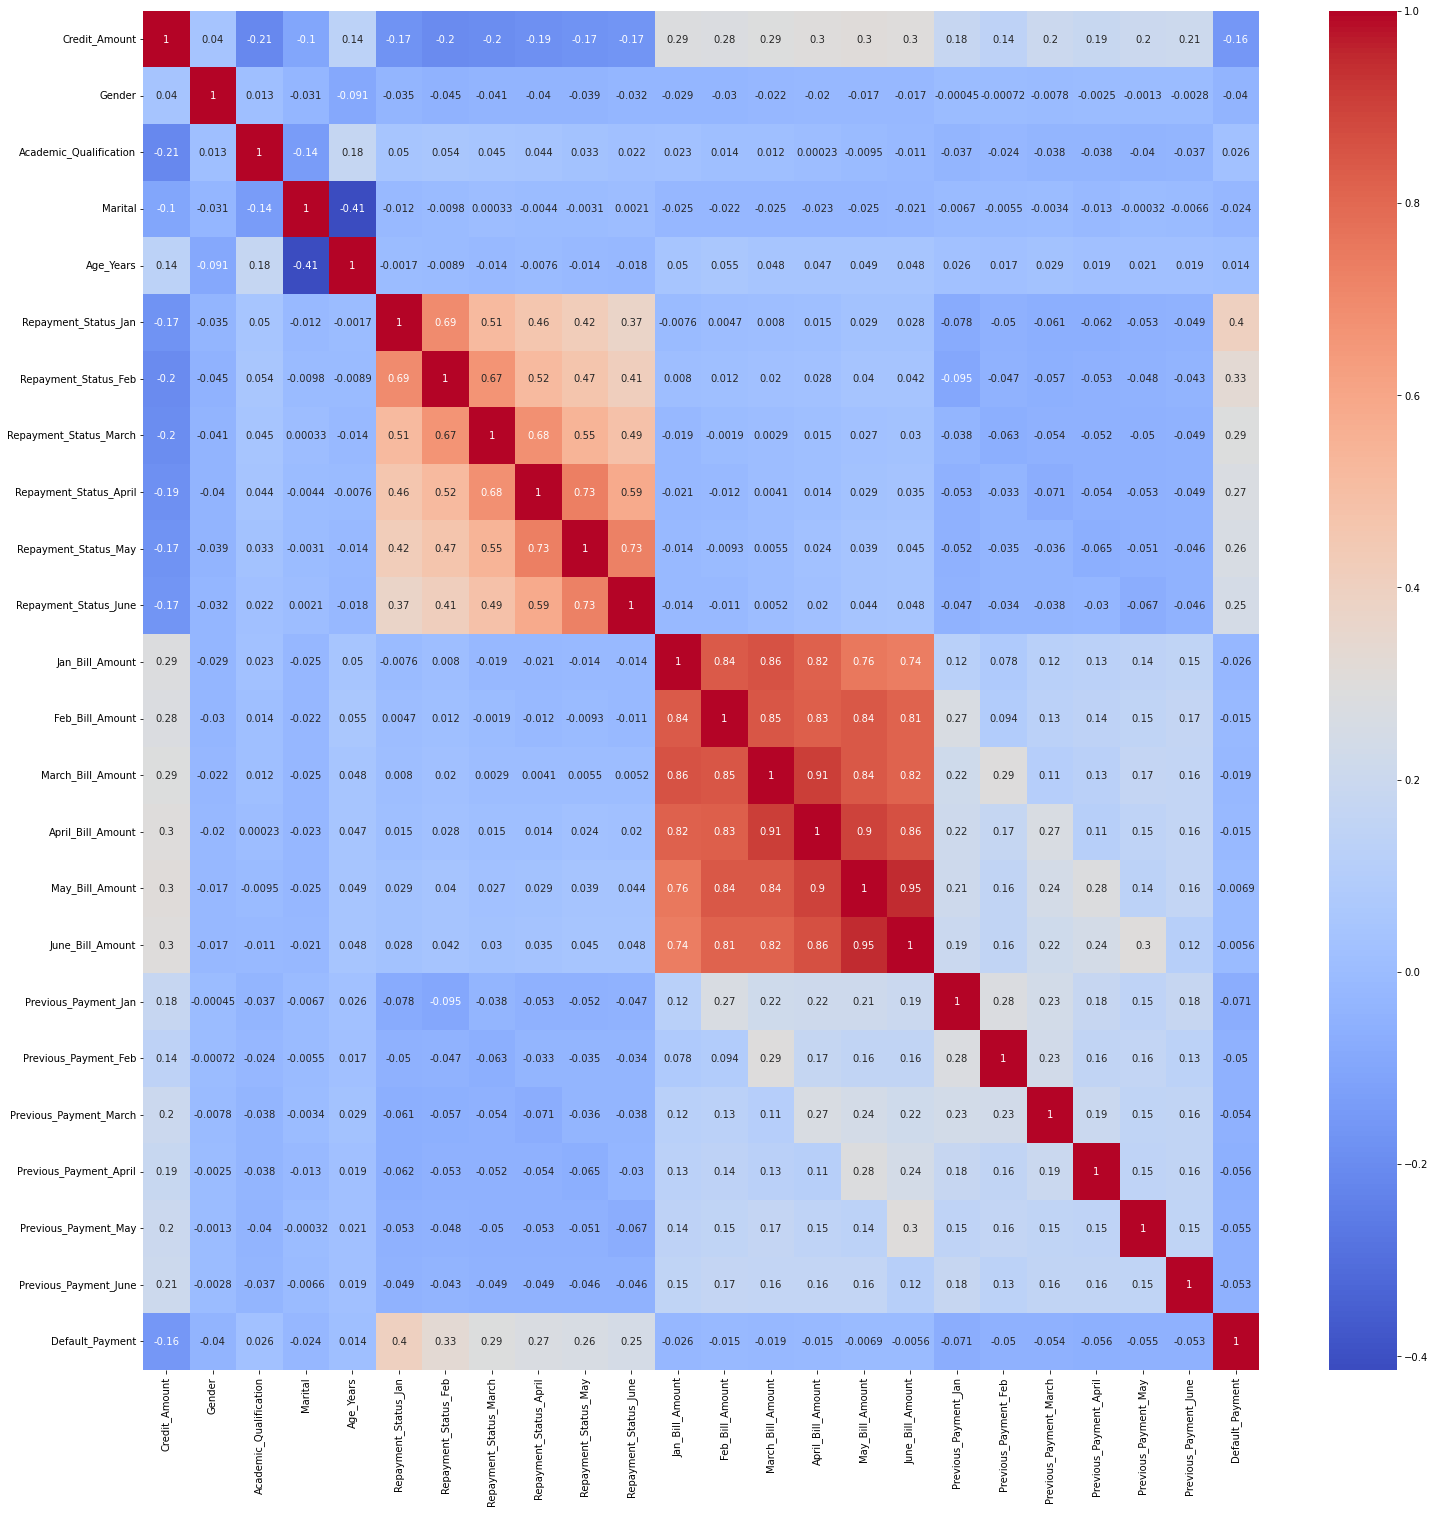

In [15]:
plt.figure(figsize=(25,25))
#heatmap=sns.heatmap(x,linewidth=1,annot=True,cmap=plt.cm.Blues)
heatmap=sns.heatmap(x,cmap="coolwarm",annot=True)
plt.show()

# outlier handling

<AxesSubplot:>

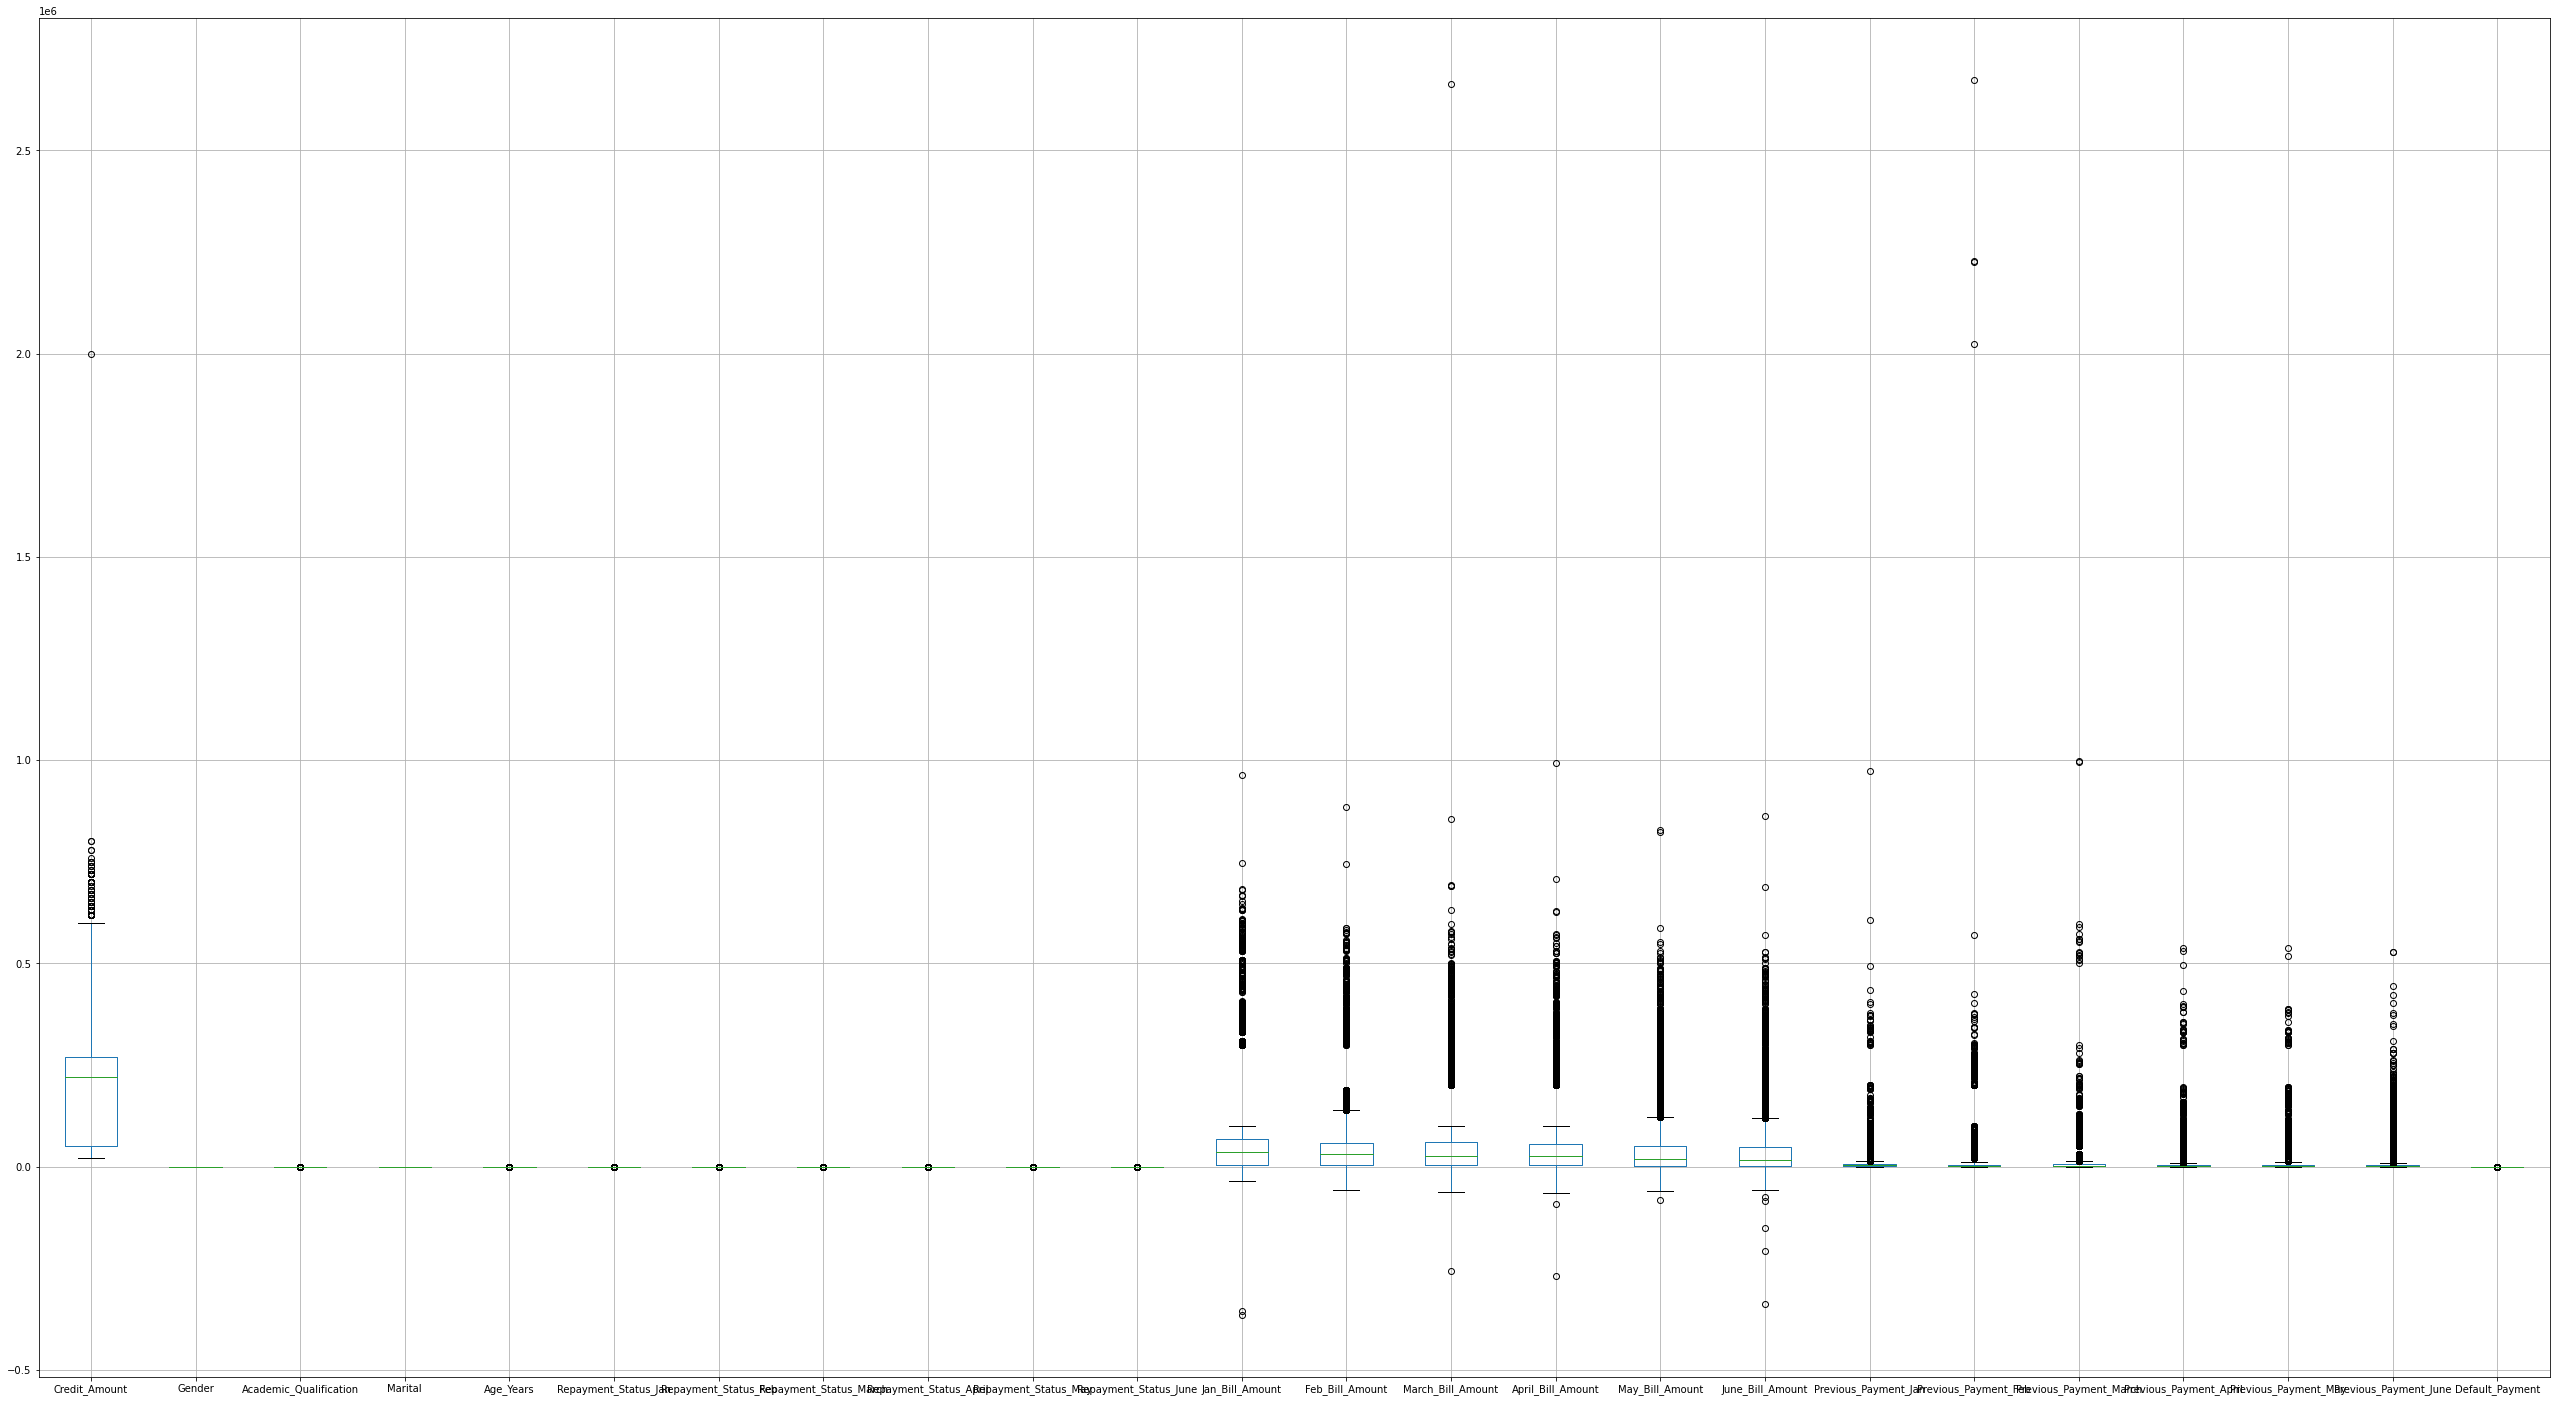

In [16]:
fig=plt.figure(figsize=(45,25))
df.boxplot()

# For credit amount

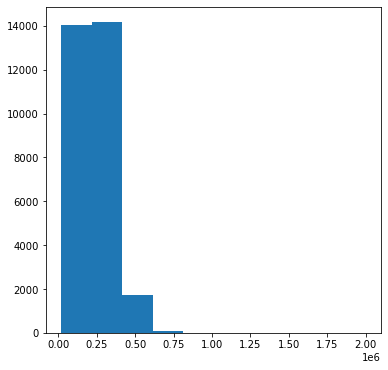

In [17]:
fig=plt.figure(figsize=(6,6))
plt.hist(df.Credit_Amount)
plt.show()

<AxesSubplot:xlabel='Credit_Amount', ylabel='Density'>

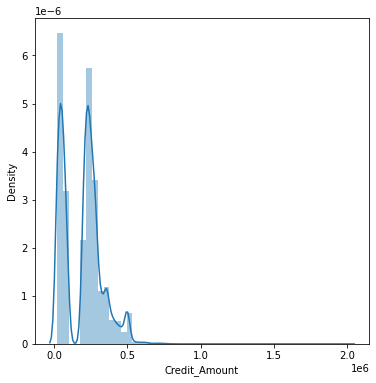

In [18]:
fig=plt.figure(figsize=(6,6))
sns.distplot(df.Credit_Amount)

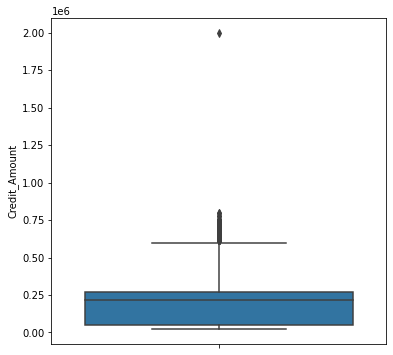

In [19]:
fig=plt.figure(figsize=(6,6))
sns.boxplot(data=df,y="Credit_Amount")
plt.show()

In [20]:
df.Credit_Amount.value_counts()

50000.0      3365
200000.0     2576
220000.0     2513
20000.0      2469
30000.0      1610
             ... 
730000.0        2
2000000.0       1
327680.0        1
760000.0        1
690000.0        1
Name: Credit_Amount, Length: 64, dtype: int64

In [21]:
df["Credit_Amount"].describe()

count    3.000000e+04
mean     1.929173e+05
std      1.322888e+05
min      2.000000e+04
25%      5.000000e+04
50%      2.200000e+05
75%      2.700000e+05
max      2.000000e+06
Name: Credit_Amount, dtype: float64

In [22]:
iqr=df.Credit_Amount.quantile(0.75)-df.Credit_Amount.quantile(0.25)
iqr

220000.0

In [23]:
lb=df["Credit_Amount"].quantile(0.25)-(iqr*3) #last limit is 3 for covering more area we have to increase limit
ub=df["Credit_Amount"].quantile(0.75)+(iqr*3)
print(lb,ub)

-610000.0 930000.0


<AxesSubplot:ylabel='Credit_Amount'>

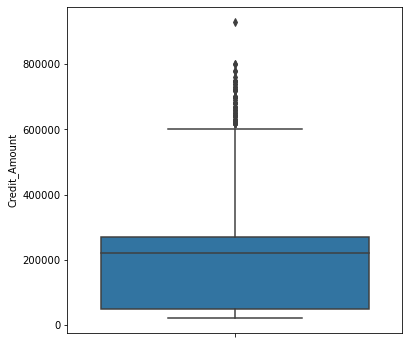

In [24]:
df.loc[df["Credit_Amount"]>930000.0,"Credit_Amount"]=930000.0
fig=plt.figure(figsize=(6,6))
sns.boxplot(data=df,y="Credit_Amount")

<AxesSubplot:xlabel='Credit_Amount', ylabel='Density'>

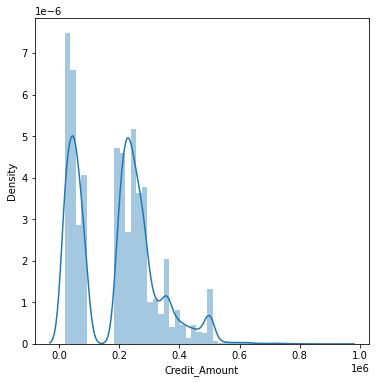

In [25]:
fig=plt.figure(figsize=(6,6))
sns.distplot(df.Credit_Amount)


# for age years

<AxesSubplot:ylabel='Age_Years'>

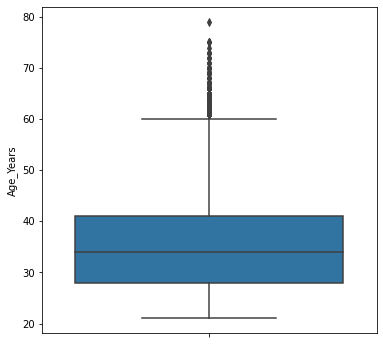

In [26]:
fig=plt.figure(figsize=(6,6))
sns.boxplot(data=df,y="Age_Years")

(array([5.127e+03, 8.261e+03, 6.514e+03, 4.812e+03, 2.606e+03, 1.836e+03,
        6.280e+02, 1.710e+02, 4.000e+01, 5.000e+00]),
 array([21. , 26.8, 32.6, 38.4, 44.2, 50. , 55.8, 61.6, 67.4, 73.2, 79. ]),
 <BarContainer object of 10 artists>)

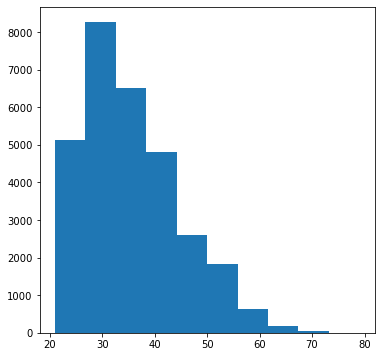

In [27]:
fig=plt.figure(figsize=(6,6))
plt.hist(df.Age_Years)

<AxesSubplot:xlabel='Age_Years', ylabel='Density'>

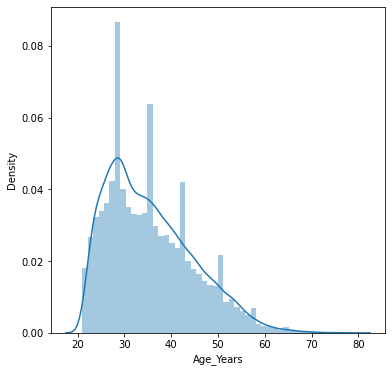

In [28]:
fig=plt.figure(figsize=(6,6))
sns.distplot(df.Age_Years)

In [29]:

iqr=df.Age_Years.quantile(0.75)-df.Age_Years.quantile(0.25)
iqr

13.0

In [30]:
lb=df["Age_Years"].quantile(0.25)-(iqr*3) #last limit is 3 for covering more area we have to increase limit
ub=df["Age_Years"].quantile(0.75)+(iqr*3)
print(lb,ub)

-11.0 80.0


In [31]:

df.loc[df["Age_Years"]> 80.0,"Age_Years"]= 80.0


<AxesSubplot:ylabel='Age_Years'>

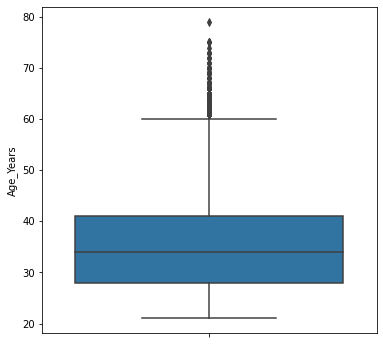

In [32]:
fig=plt.figure(figsize=(6,6))
sns.boxplot(data=df,y="Age_Years")

<AxesSubplot:xlabel='Age_Years', ylabel='Density'>

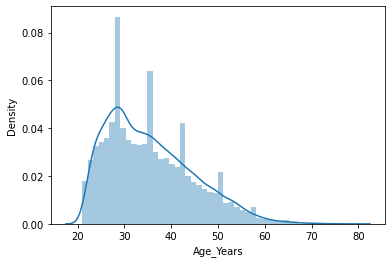

In [33]:
sns.distplot(df.Age_Years)

# for Jan_Bill_Amount

(array([2.0000e+00, 0.0000e+00, 1.2743e+04, 1.2347e+04, 0.0000e+00,
        4.7460e+03, 1.1800e+02, 4.2000e+01, 1.0000e+00, 1.0000e+00]),
 array([-365580. , -232568.7,  -99557.4,   33453.9,  166465.2,  299476.5,
         432487.8,  565499.1,  698510.4,  831521.7,  964533. ]),
 <BarContainer object of 10 artists>)

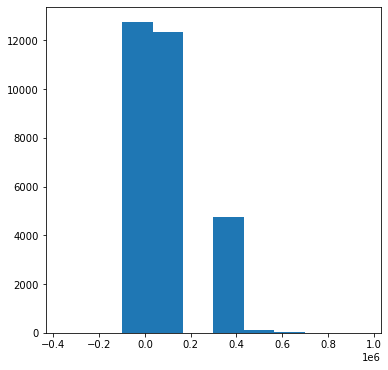

In [34]:
fig=plt.figure(figsize=(6,6))
plt.hist(df.Jan_Bill_Amount)

<AxesSubplot:xlabel='Jan_Bill_Amount', ylabel='Density'>

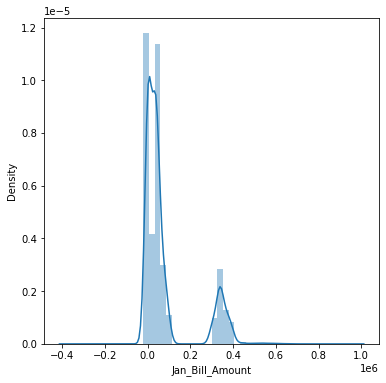

In [35]:
fig=plt.figure(figsize=(6,6))
sns.distplot(df.Jan_Bill_Amount)

<AxesSubplot:ylabel='Jan_Bill_Amount'>

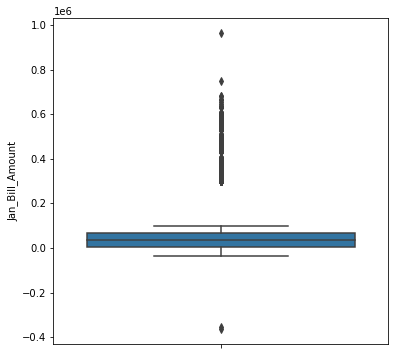

In [36]:
fig=plt.figure(figsize=(6,6))
sns.boxplot(data=df,y="Jan_Bill_Amount")

In [37]:
df.Jan_Bill_Amount.value_counts()

 0.0         2008
 390.0        250
 336.0        141
 780.0         76
 3333.0        68
             ... 
 309636.0       1
 43034.0        1
 353398.0       1
 305930.0       1
-3645.0         1
Name: Jan_Bill_Amount, Length: 14575, dtype: int64

In [38]:
df["Jan_Bill_Amount"].describe()

count     30000.000000
mean      81581.060100
std      123026.372701
min     -365580.000000
25%        3890.000000
50%       35661.500000
75%       67091.000000
max      964533.000000
Name: Jan_Bill_Amount, dtype: float64

In [39]:
iqr=df.Jan_Bill_Amount.quantile(0.75)-df.Jan_Bill_Amount.quantile(0.25)
iqr

63201.0

In [40]:
lb=df["Jan_Bill_Amount"].quantile(0.25)-(iqr*3) #last limit is 3 for covering more area we have to increase limit
ub=df["Jan_Bill_Amount"].quantile(0.75)+(iqr*3)
print(lb,ub)

-185713.0 256694.0


<AxesSubplot:ylabel='Jan_Bill_Amount'>

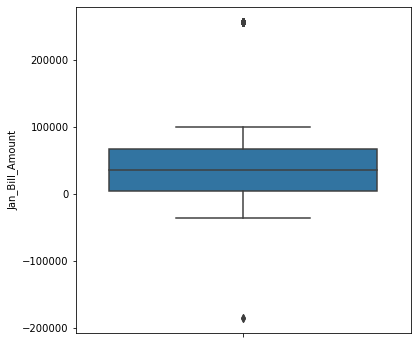

In [41]:

df.loc[df["Jan_Bill_Amount"]>256694.0,"Jan_Bill_Amount"]=256694.0
df.loc[df["Jan_Bill_Amount"]<-185713.0,"Jan_Bill_Amount"]=-185713.0
fig=plt.figure(figsize=(6,6))
sns.boxplot(data=df,y="Jan_Bill_Amount")

<AxesSubplot:xlabel='Jan_Bill_Amount', ylabel='Density'>

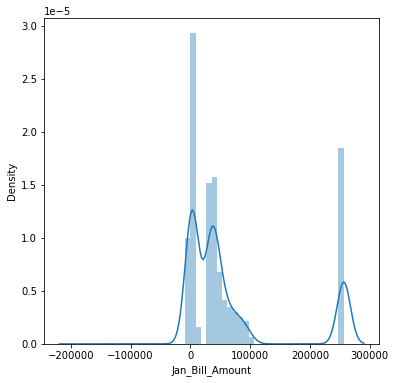

In [42]:
fig=plt.figure(figsize=(6,6))
sns.distplot(df.Jan_Bill_Amount)

# for Feb_Bill_Amount

(array([1.7057e+04, 9.2610e+03, 2.2900e+03, 3.6700e+02, 8.9400e+02,
        9.9000e+01, 3.0000e+01, 0.0000e+00, 1.0000e+00, 1.0000e+00]),
 array([-58777. ,  35483.8, 129744.6, 224005.4, 318266.2, 412527. ,
        506787.8, 601048.6, 695309.4, 789570.2, 883831. ]),
 <BarContainer object of 10 artists>)

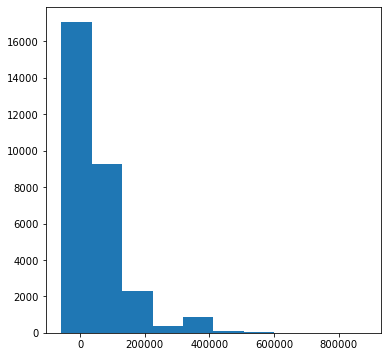

In [43]:
fig=plt.figure(figsize=(6,6))
plt.hist(df.Feb_Bill_Amount)

<AxesSubplot:xlabel='Feb_Bill_Amount', ylabel='Density'>

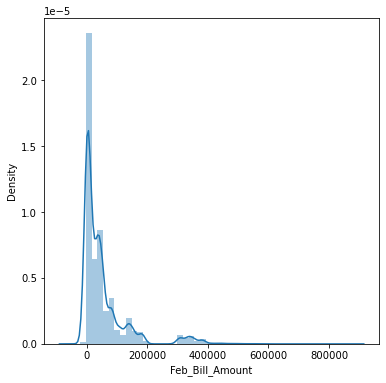

In [44]:
fig=plt.figure(figsize=(6,6))
sns.distplot(df.Feb_Bill_Amount)

<AxesSubplot:ylabel='Feb_Bill_Amount'>

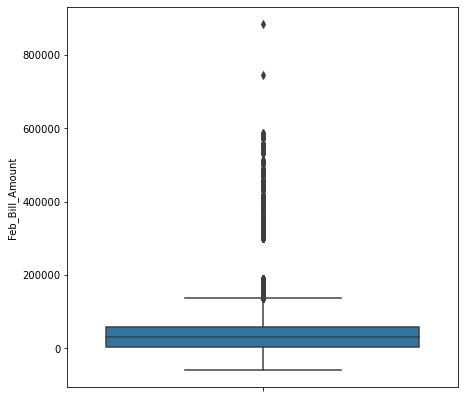

In [45]:
fig=plt.figure(figsize=(7,7))
sns.boxplot(data=df,y="Feb_Bill_Amount")

In [46]:
df.Feb_Bill_Amount.value_counts()

0.0         2506
380.0        251
335.0         89
780.0         76
315.0         76
            ... 
301755.0       1
75303.0        1
57340.0        1
108078.0       1
78378.0        1
Name: Feb_Bill_Amount, Length: 13777, dtype: int64

In [47]:
df["Feb_Bill_Amount"].describe()

count     30000.000000
mean      52517.103000
std       80401.365192
min      -58777.000000
25%        3517.000000
50%       30538.000000
75%       57420.500000
max      883831.000000
Name: Feb_Bill_Amount, dtype: float64

In [48]:
iqr=df.Feb_Bill_Amount.quantile(0.75)-df.Feb_Bill_Amount.quantile(0.25)
iqr

53903.5

In [49]:
lb=df["Feb_Bill_Amount"].quantile(0.25)-(iqr*3) #last limit is 3 for covering more area we have to increase limit
ub=df["Feb_Bill_Amount"].quantile(0.75)+(iqr*3)
print(lb,ub)

-158193.5 219131.0


<AxesSubplot:ylabel='Feb_Bill_Amount'>

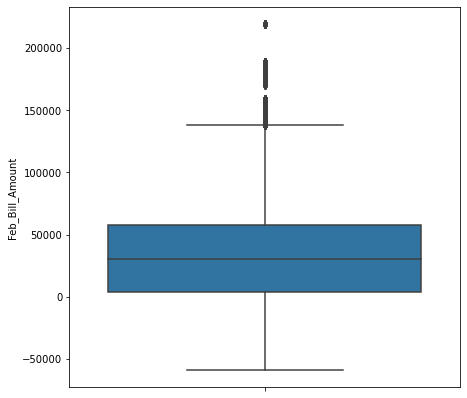

In [50]:
df.loc[df["Feb_Bill_Amount"]>219131.0,"Feb_Bill_Amount"]=219131.0
fig=plt.figure(figsize=(7,7))
sns.boxplot(data=df,y="Feb_Bill_Amount")

<AxesSubplot:xlabel='Feb_Bill_Amount', ylabel='Density'>

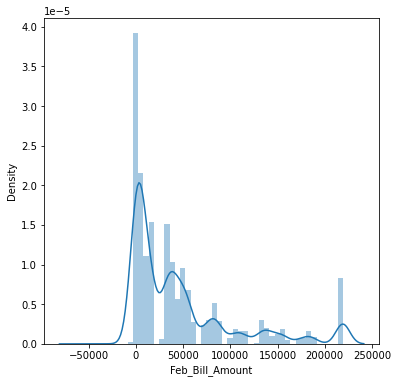

In [51]:
fig=plt.figure(figsize=(6,6))
sns.distplot(df.Feb_Bill_Amount)

# for March_Bill_Amount

(array([1.8567e+04, 1.1130e+04, 2.9700e+02, 5.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([-257264. ,   34871.3,  327006.6,  619141.9,  911277.2, 1203412.5,
        1495547.8, 1787683.1, 2079818.4, 2371953.7, 2664089. ]),
 <BarContainer object of 10 artists>)

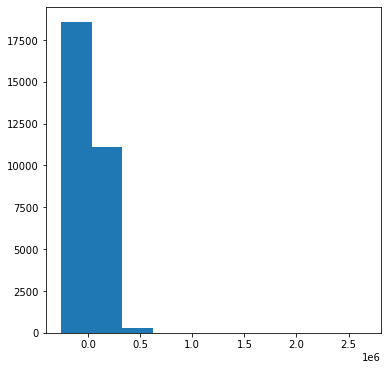

In [52]:
fig=plt.figure(figsize=(6,6))
plt.hist(df.March_Bill_Amount)

<AxesSubplot:xlabel='March_Bill_Amount', ylabel='Density'>

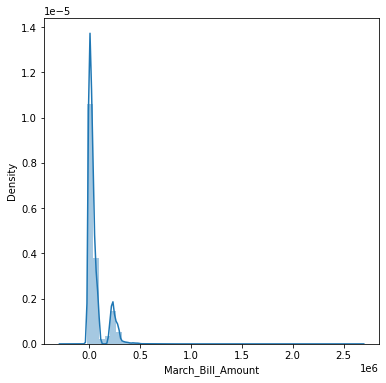

In [53]:
fig=plt.figure(figsize=(6,6))
sns.distplot(df.March_Bill_Amount)

<AxesSubplot:ylabel='March_Bill_Amount'>

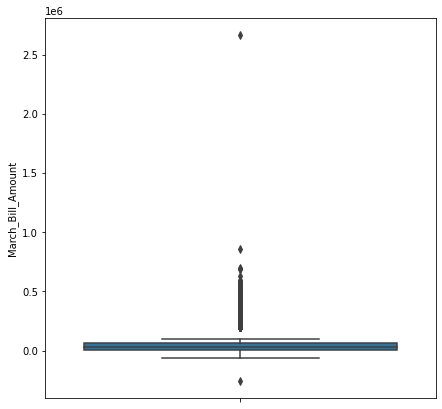

In [54]:
fig=plt.figure(figsize=(7,7))
sns.boxplot(data=df,y="March_Bill_Amount")

In [55]:
df.March_Bill_Amount.value_counts()

0.0         2870
390.0        275
326.0        125
780.0         74
396.0         48
            ... 
25992.0        1
4265.0         1
276523.0       1
275804.0       1
49764.0        1
Name: March_Bill_Amount, Length: 18832, dtype: int64

In [56]:
df["March_Bill_Amount"].describe()

count    3.000000e+04
mean     5.900389e+04
std      8.841747e+04
min     -2.572640e+05
25%      2.876000e+03
50%      2.656800e+04
75%      6.025250e+04
max      2.664089e+06
Name: March_Bill_Amount, dtype: float64

In [57]:
iqr=df.March_Bill_Amount.quantile(0.75)-df.March_Bill_Amount.quantile(0.25)
iqr

57376.5

In [58]:
lb=df["March_Bill_Amount"].quantile(0.25)-(iqr*3) #last limit is 3 for covering more area we have to increase limit
ub=df["March_Bill_Amount"].quantile(0.75)+(iqr*3)
print(lb,ub)

-169253.5 232382.0


<AxesSubplot:ylabel='March_Bill_Amount'>

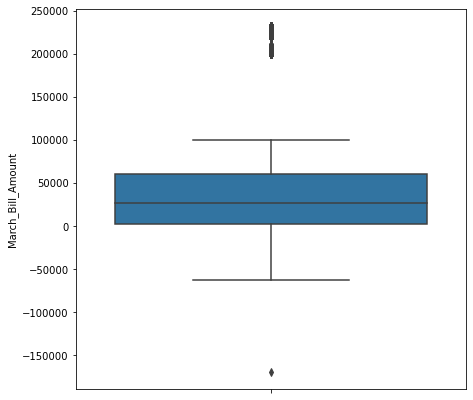

In [59]:
df.loc[df["March_Bill_Amount"]<-169253.5,"March_Bill_Amount"]=-169253.5
df.loc[df["March_Bill_Amount"]> 232382.0,"March_Bill_Amount"]= 232382.0
fig=plt.figure(figsize=(7,7))
sns.boxplot(data=df,y="March_Bill_Amount")

<AxesSubplot:xlabel='March_Bill_Amount', ylabel='Density'>

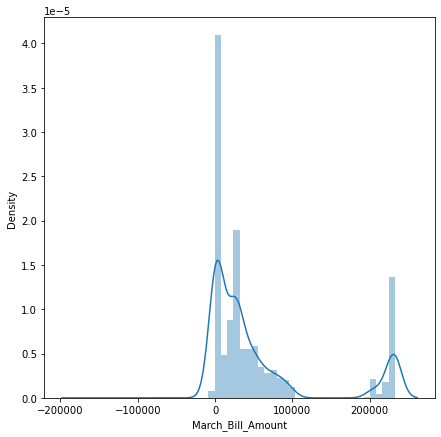

In [60]:
fig=plt.figure(figsize=(7,7))
sns.distplot(df.March_Bill_Amount)

# for April_Bill_Amount

(array([1.0000e+00, 1.6000e+01, 2.6014e+04, 1.7590e+03, 2.0560e+03,
        1.2500e+02, 2.5000e+01, 3.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([-270000. , -143740.4,  -17480.8,  108778.8,  235038.4,  361298. ,
         487557.6,  613817.2,  740076.8,  866336.4,  992596. ]),
 <BarContainer object of 10 artists>)

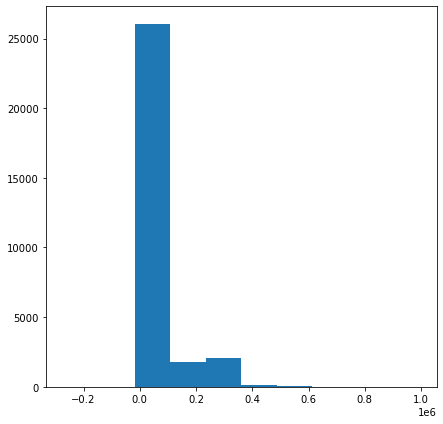

In [61]:
fig=plt.figure(figsize=(7,7))
plt.hist(df.April_Bill_Amount)

<AxesSubplot:xlabel='April_Bill_Amount', ylabel='Density'>

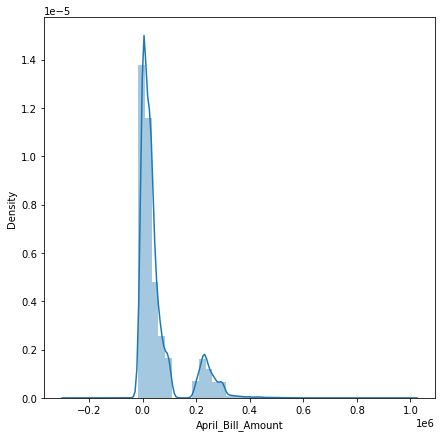

In [62]:
fig=plt.figure(figsize=(7,7))
sns.distplot(df.April_Bill_Amount)

<AxesSubplot:ylabel='April_Bill_Amount'>

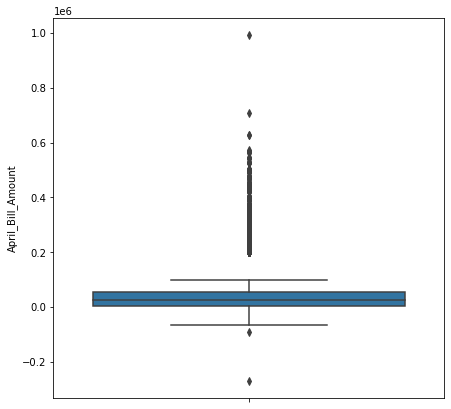

In [63]:
fig=plt.figure(figsize=(7,7))
sns.boxplot(data=df,y="April_Bill_Amount")

In [64]:
df.April_Bill_Amount.value_counts()

 0.0         3195
 390.0        262
 326.0        130
 790.0        107
-2.0           48
             ... 
 63249.0        1
 67900.0        1
 202472.0       1
 45775.0        1
 36535.0        1
Name: April_Bill_Amount, Length: 15358, dtype: int64

In [65]:
df["April_Bill_Amount"].describe()

count     30000.000000
mean      55122.263933
std       83577.329356
min     -270000.000000
25%        2671.500000
50%       25629.000000
75%       54508.500000
max      992596.000000
Name: April_Bill_Amount, dtype: float64

In [66]:
iqr=df.April_Bill_Amount.quantile(0.75)-df.April_Bill_Amount.quantile(0.25)
iqr

51837.0

In [67]:
lb=df["April_Bill_Amount"].quantile(0.25)-(iqr*3) #last limit is 3 for covering more area we have to increase limit
ub=df["April_Bill_Amount"].quantile(0.75)+(iqr*3)
print(lb,ub)

-152839.5 210019.5


<AxesSubplot:ylabel='April_Bill_Amount'>

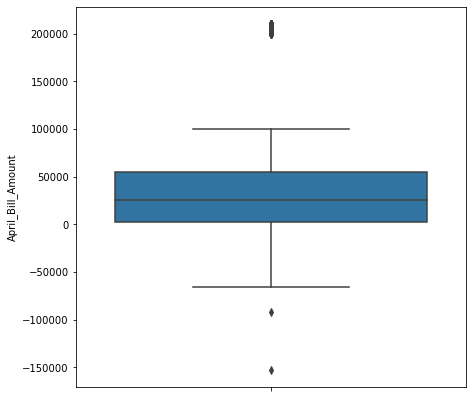

In [68]:
df.loc[df["April_Bill_Amount"]<-152839.5,"April_Bill_Amount"]=-152839.5
df.loc[df["April_Bill_Amount"]>210019.5,"April_Bill_Amount"]=210019.5
fig=plt.figure(figsize=(7,7))
sns.boxplot(data=df,y="April_Bill_Amount")

<AxesSubplot:xlabel='April_Bill_Amount', ylabel='Density'>

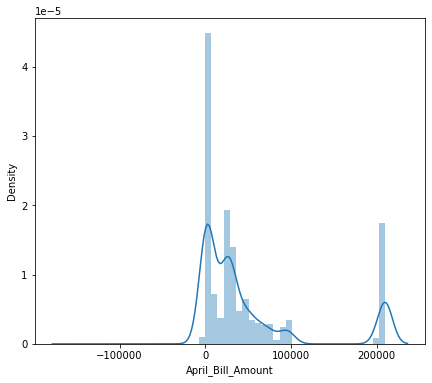

In [69]:
fig=plt.figure(figsize=(7,6))
sns.distplot(df.April_Bill_Amount)

# for May_Bill_Amount

(array([1.2096e+04, 1.4263e+04, 2.7630e+03, 5.6200e+02, 2.1800e+02,
        7.1000e+01, 2.4000e+01, 1.0000e+00, 0.0000e+00, 2.0000e+00]),
 array([-81334. ,   9516.5, 100367. , 191217.5, 282068. , 372918.5,
        463769. , 554619.5, 645470. , 736320.5, 827171. ]),
 <BarContainer object of 10 artists>)

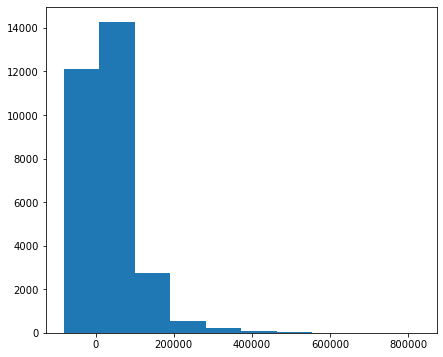

In [70]:
fig=plt.figure(figsize=(7,6))
plt.hist(df.May_Bill_Amount)

<AxesSubplot:xlabel='May_Bill_Amount', ylabel='Density'>

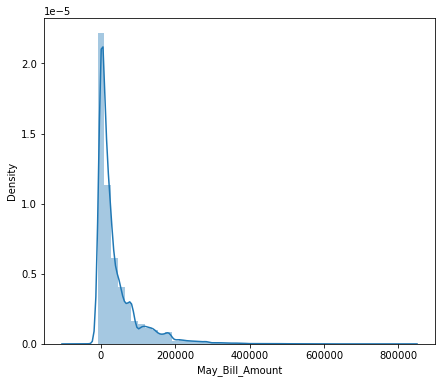

In [71]:
fig=plt.figure(figsize=(7,6))
sns.distplot(df.May_Bill_Amount)

<AxesSubplot:ylabel='May_Bill_Amount'>

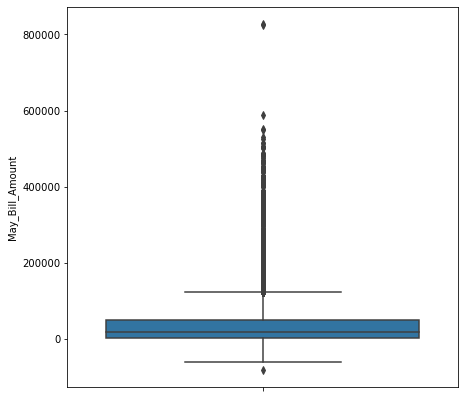

In [72]:
fig=plt.figure(figsize=(7,7))
sns.boxplot(data=df,y="May_Bill_Amount")

In [73]:
df.May_Bill_Amount.value_counts()

0.0         3506
380.0        247
780.0         98
316.0         79
326.0         62
            ... 
7826.0         1
32213.0        1
187458.0       1
20086.0        1
31237.0        1
Name: May_Bill_Amount, Length: 18611, dtype: int64

In [74]:
df["May_Bill_Amount"].describe()

count     30000.000000
mean      39939.618800
std       60373.934792
min      -81334.000000
25%        1763.000000
50%       18043.000000
75%       50190.500000
max      827171.000000
Name: May_Bill_Amount, dtype: float64

In [75]:
iqr=df.May_Bill_Amount.quantile(0.75)-df.May_Bill_Amount.quantile(0.25)
iqr

48427.5

In [76]:
lb=df["May_Bill_Amount"].quantile(0.25)-(iqr*3) #last limit is 3 for covering more area we have to increase limit
ub=df["May_Bill_Amount"].quantile(0.75)+(iqr*3)
print(lb,ub)

-143519.5 195473.0


<AxesSubplot:ylabel='May_Bill_Amount'>

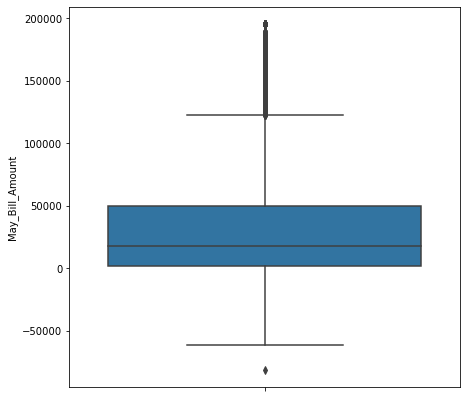

In [77]:
df.loc[df["May_Bill_Amount"]<-143519.5,"May_Bill_Amount"]=-143519.5
df.loc[df["May_Bill_Amount"]>195473.0,"May_Bill_Amount"]=195473.0
fig=plt.figure(figsize=(7,7))
sns.boxplot(data=df,y="May_Bill_Amount")

<AxesSubplot:xlabel='May_Bill_Amount', ylabel='Density'>

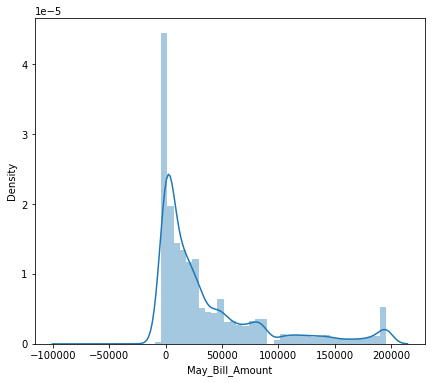

In [78]:
fig=plt.figure(figsize=(7,6))
sns.distplot(df.May_Bill_Amount)

# for June_Bill_Amount

(array([1.0000e+00, 2.0000e+00, 1.7136e+04, 1.0866e+04, 1.6170e+03,
        3.0100e+02, 6.9000e+01, 6.0000e+00, 1.0000e+00, 1.0000e+00]),
 array([-338603. , -218576.3,  -98549.6,   21477.1,  141503.8,  261530.5,
         381557.2,  501583.9,  621610.6,  741637.3,  861664. ]),
 <BarContainer object of 10 artists>)

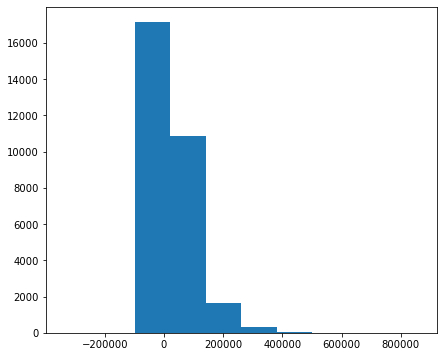

In [79]:
fig=plt.figure(figsize=(7,6))
plt.hist(df.June_Bill_Amount)

<AxesSubplot:xlabel='June_Bill_Amount', ylabel='Density'>

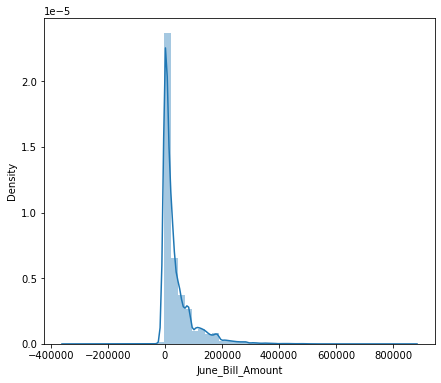

In [80]:
fig=plt.figure(figsize=(7,6))
sns.distplot(df.June_Bill_Amount)

<AxesSubplot:ylabel='June_Bill_Amount'>

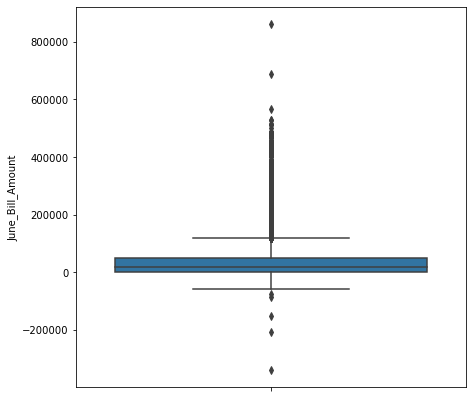

In [81]:
fig=plt.figure(figsize=(7,7))
sns.boxplot(data=df,y="June_Bill_Amount")

In [82]:
df.June_Bill_Amount.value_counts()

0.0         4020
380.0        224
780.0         89
150.0         78
316.0         77
            ... 
14163.0        1
155768.0       1
10573.0        1
3013.0         1
15313.0        1
Name: June_Bill_Amount, Length: 18376, dtype: int64

In [83]:
df["June_Bill_Amount"].describe()

count     30000.000000
mean      38506.051533
std       59104.280171
min     -338603.000000
25%        1256.000000
50%       17071.000000
75%       48655.250000
max      861664.000000
Name: June_Bill_Amount, dtype: float64

In [84]:
iqr=df.June_Bill_Amount.quantile(0.75)-df.June_Bill_Amount.quantile(0.25)
iqr

47399.25

In [85]:
lb=df["June_Bill_Amount"].quantile(0.25)-(iqr*3) #last limit is 3 for covering more area we have to increase limit
ub=df["June_Bill_Amount"].quantile(0.75)+(iqr*3)
print(lb,ub)

-140941.75 190853.0


<AxesSubplot:ylabel='June_Bill_Amount'>

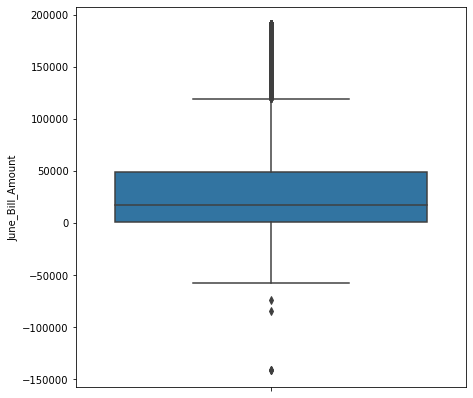

In [86]:
df.loc[df["June_Bill_Amount"]<-140941.75,"June_Bill_Amount"]=-140941.75
df.loc[df["June_Bill_Amount"]>190853.0,"June_Bill_Amount"]=190853.0
fig=plt.figure(figsize=(7,7))
sns.boxplot(data=df,y="June_Bill_Amount")

<AxesSubplot:xlabel='June_Bill_Amount', ylabel='Density'>

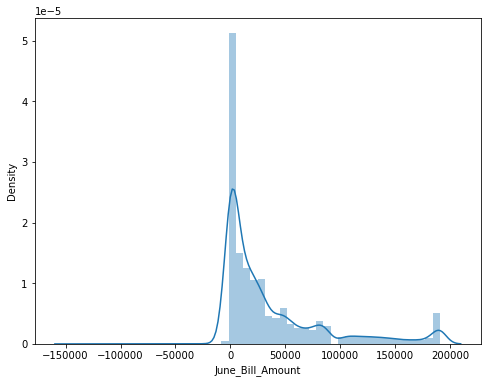

In [87]:
fig=plt.figure(figsize=(8,6))
sns.distplot(df.June_Bill_Amount)

# for previous_payment jan

(array([2.9822e+04, 1.3100e+02, 7.0000e+00, 3.4000e+01, 3.0000e+00,
        1.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([     0. ,  97366.3, 194732.6, 292098.9, 389465.2, 486831.5,
        584197.8, 681564.1, 778930.4, 876296.7, 973663. ]),
 <BarContainer object of 10 artists>)

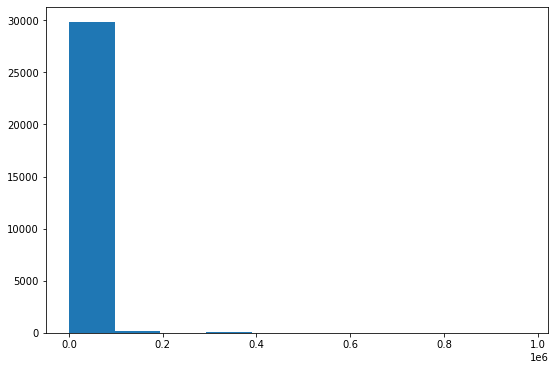

In [88]:
fig=plt.figure(figsize=(9,6))
plt.hist(df.Previous_Payment_Jan)

<AxesSubplot:xlabel='Previous_Payment_Jan', ylabel='Density'>

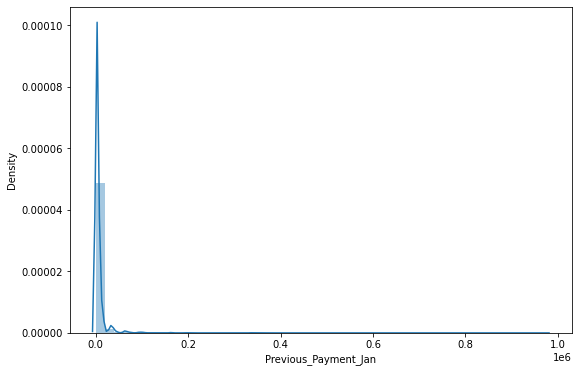

In [89]:
fig=plt.figure(figsize=(9,6))
sns.distplot(df.Previous_Payment_Jan)

<AxesSubplot:ylabel='Previous_Payment_Jan'>

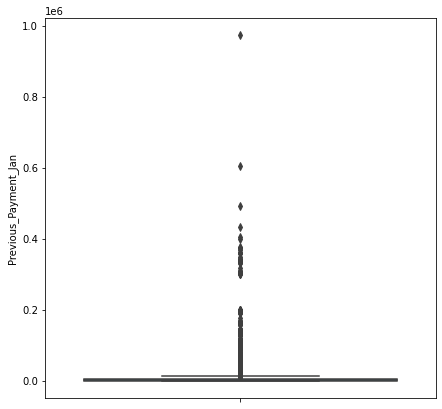

In [90]:
fig=plt.figure(figsize=(7,7))
sns.boxplot(data=df,y="Previous_Payment_Jan")

In [91]:
df["Previous_Payment_Jan"].describe()

count     30000.000000
mean       6285.653867
std       18944.920299
min           0.000000
25%        1000.000000
50%        3000.000000
75%        6000.000000
max      973663.000000
Name: Previous_Payment_Jan, dtype: float64

# for previous_payment_Feb

(array([2.9943e+04, 5.2000e+01, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 2.0000e+00, 1.0000e+00]),
 array([      0. ,  267425.9,  534851.8,  802277.7, 1069703.6, 1337129.5,
        1604555.4, 1871981.3, 2139407.2, 2406833.1, 2674259. ]),
 <BarContainer object of 10 artists>)

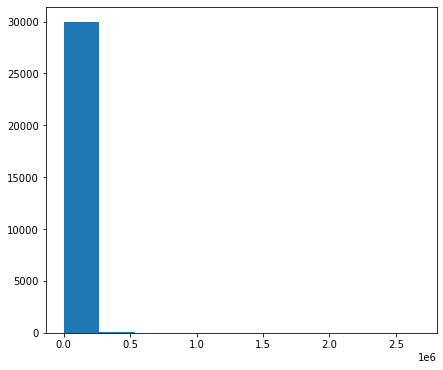

In [92]:
fig=plt.figure(figsize=(7,6))
plt.hist(df.Previous_Payment_Feb)

<AxesSubplot:xlabel='Previous_Payment_Feb', ylabel='Density'>

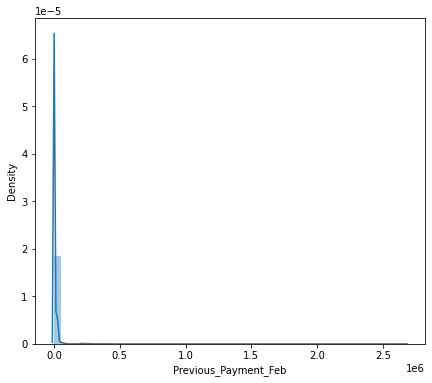

In [93]:
fig=plt.figure(figsize=(7,6))
sns.distplot(df.Previous_Payment_Feb)

<AxesSubplot:ylabel='Previous_Payment_Feb'>

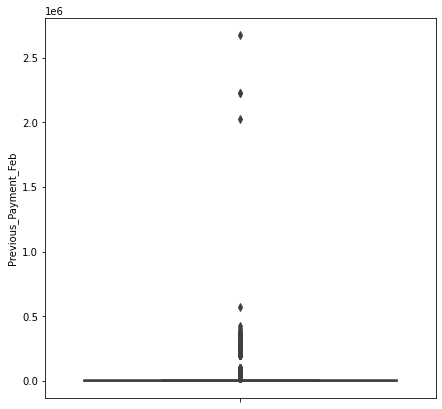

In [94]:
fig=plt.figure(figsize=(7,7))
sns.boxplot(data=df,y="Previous_Payment_Feb")

In [95]:
df["Previous_Payment_Feb"].describe()

count    3.000000e+04
mean     7.466544e+03
std      3.467950e+04
min      0.000000e+00
25%      7.700000e+02
50%      2.542000e+03
75%      5.000000e+03
max      2.674259e+06
Name: Previous_Payment_Feb, dtype: float64

# for previous_payment_march

(array([2.9813e+04, 1.4600e+02, 2.3000e+01, 1.0000e+00, 0.0000e+00,
        1.5000e+01, 0.0000e+00, 0.0000e+00, 0.0000e+00, 2.0000e+00]),
 array([     0. ,  99905.5, 199811. , 299716.5, 399622. , 499527.5,
        599433. , 699338.5, 799244. , 899149.5, 999055. ]),
 <BarContainer object of 10 artists>)

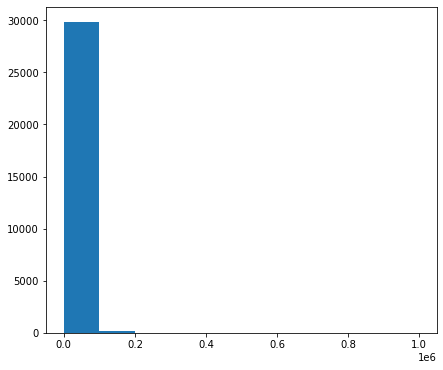

In [96]:
fig=plt.figure(figsize=(7,6))
plt.hist(df.Previous_Payment_March)

<AxesSubplot:xlabel='Previous_Payment_March', ylabel='Density'>

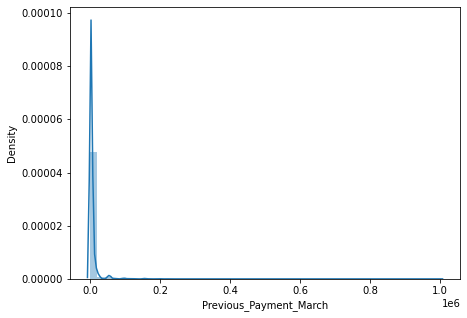

In [97]:
fig=plt.figure(figsize=(7,5))
sns.distplot(df.Previous_Payment_March)

<AxesSubplot:ylabel='Previous_Payment_March'>

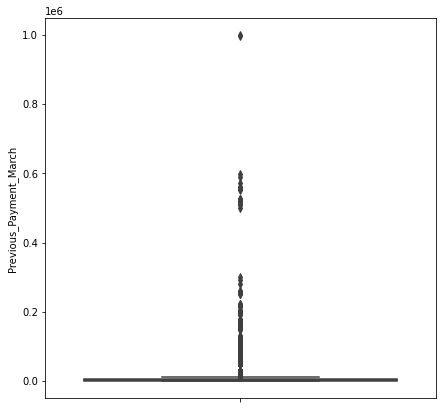

In [98]:
fig=plt.figure(figsize=(7,7))
sns.boxplot(data=df,y="Previous_Payment_March")

In [99]:
df["Previous_Payment_March"].describe()

count     30000.000000
mean       5836.140567
std       20696.306703
min           0.000000
25%         550.000000
50%        1900.000000
75%        5500.000000
max      999055.000000
Name: Previous_Payment_March, dtype: float64

# for previous_payment_April

(array([2.9647e+04, 2.2700e+02, 7.9000e+01, 1.4000e+01, 0.0000e+00,
        1.0000e+01, 1.3000e+01, 6.0000e+00, 1.0000e+00, 3.0000e+00]),
 array([     0. ,  53889.7, 107779.4, 161669.1, 215558.8, 269448.5,
        323338.2, 377227.9, 431117.6, 485007.3, 538897. ]),
 <BarContainer object of 10 artists>)

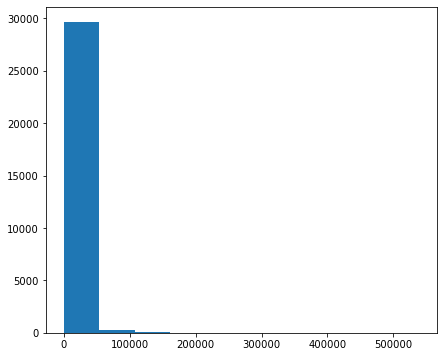

In [100]:
fig=plt.figure(figsize=(7,6))
plt.hist(df.Previous_Payment_April)

<AxesSubplot:xlabel='Previous_Payment_April', ylabel='Density'>

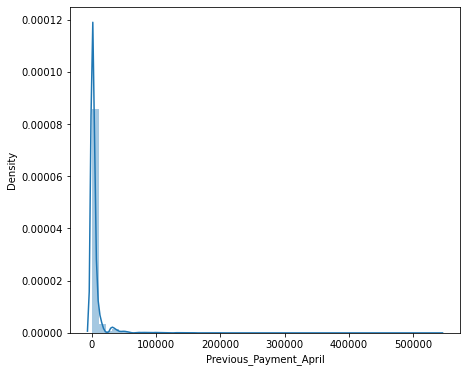

In [101]:
fig=plt.figure(figsize=(7,6))
sns.distplot(df.Previous_Payment_April)

<AxesSubplot:ylabel='Previous_Payment_April'>

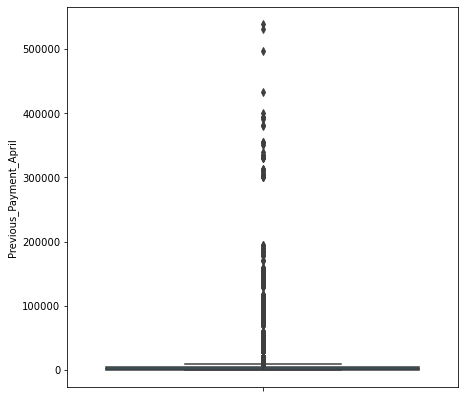

In [102]:
fig=plt.figure(figsize=(7,7))
sns.boxplot(data=df,y="Previous_Payment_April")

In [103]:
df["Previous_Payment_April"].describe()

count     30000.000000
mean       5127.687433
std       17103.762740
min           0.000000
25%         333.000000
50%        1500.000000
75%        4013.250000
max      538897.000000
Name: Previous_Payment_April, dtype: float64

# for previous_payment May

(array([2.9557e+04, 3.1800e+02, 6.2000e+01, 3.1000e+01, 0.0000e+00,
        1.5000e+01, 1.0000e+01, 5.0000e+00, 0.0000e+00, 2.0000e+00]),
 array([     0. ,  53653.9, 107307.8, 160961.7, 214615.6, 268269.5,
        321923.4, 375577.3, 429231.2, 482885.1, 536539. ]),
 <BarContainer object of 10 artists>)

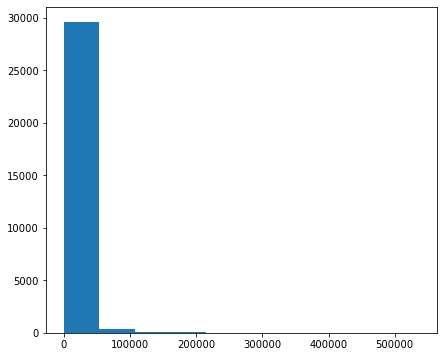

In [104]:
fig=plt.figure(figsize=(7,6))
plt.hist(df.Previous_Payment_May)

<AxesSubplot:xlabel='Previous_Payment_May', ylabel='Density'>

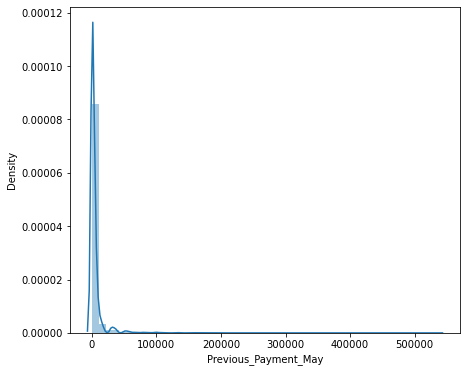

In [105]:
fig=plt.figure(figsize=(7,6))
sns.distplot(df.Previous_Payment_May)

<AxesSubplot:ylabel='Previous_Payment_May'>

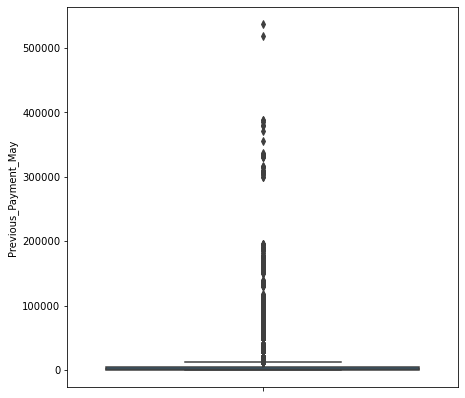

In [106]:
fig=plt.figure(figsize=(7,7))
sns.boxplot(data=df,y="Previous_Payment_May")

In [107]:
df["Previous_Payment_May"].describe()

count     30000.00000
mean       5261.19120
std       16989.50685
min           0.00000
25%         310.00000
50%        1539.00000
75%        5000.00000
max      536539.00000
Name: Previous_Payment_May, dtype: float64

# for previous_payment june

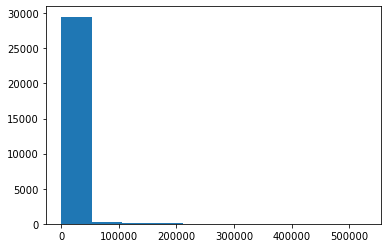

In [108]:
plt.hist(df.Previous_Payment_June)
plt.show()

<AxesSubplot:xlabel='Previous_Payment_June', ylabel='Density'>

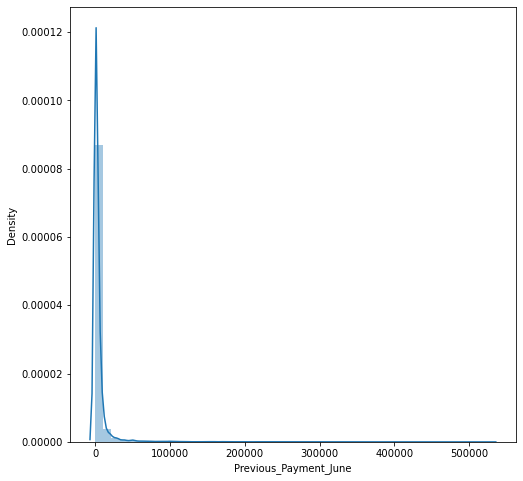

In [109]:
fig=plt.figure(figsize=(8,8))
sns.distplot(df.Previous_Payment_June)


<AxesSubplot:ylabel='Previous_Payment_June'>

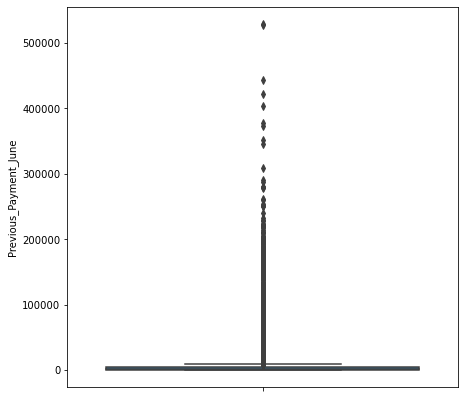

In [110]:
fig=plt.figure(figsize=(7,7))
sns.boxplot(data=df,y="Previous_Payment_June")

In [111]:
df["Previous_Payment_June"].describe()

count     30000.000000
mean       5215.502567
std       17777.465775
min           0.000000
25%         117.750000
50%        1500.000000
75%        4000.000000
max      528666.000000
Name: Previous_Payment_June, dtype: float64

# skewness treatment

In [112]:
df.skew()

Credit_Amount              0.440916
Gender                    -0.424183
Academic_Qualification     1.017944
Marital                   -0.018742
Age_Years                  0.732246
Repayment_Status_Jan       2.485379
Repayment_Status_Feb       2.488460
Repayment_Status_March     2.684191
Repayment_Status_April     3.213051
Repayment_Status_May       3.589727
Repayment_Status_June      3.495517
Jan_Bill_Amount            1.527639
Feb_Bill_Amount            1.632576
March_Bill_Amount          1.626987
April_Bill_Amount          1.669499
May_Bill_Amount            1.749921
June_Bill_Amount           1.749088
Previous_Payment_Jan      15.279685
Previous_Payment_Feb      41.802935
Previous_Payment_March    19.012134
Previous_Payment_April    13.299057
Previous_Payment_May      12.231259
Previous_Payment_June     10.640727
Default_Payment            1.343504
dtype: float64

In [113]:
df.loc[df["Credit_Amount"]==0]

,Credit_Amount,Gender,Academic_Qualification,Marital,Age_Years,Repayment_Status_Jan,Repayment_Status_Feb,Repayment_Status_March,Repayment_Status_April,Repayment_Status_May,...,April_Bill_Amount,May_Bill_Amount,June_Bill_Amount,Previous_Payment_Jan,Previous_Payment_Feb,Previous_Payment_March,Previous_Payment_April,Previous_Payment_May,Previous_Payment_June,Default_Payment


In [114]:
df.Credit_Amount.skew()

0.4409157068063006

In [115]:
df.loc[df["Age_Years"]==0]

,Credit_Amount,Gender,Academic_Qualification,Marital,Age_Years,Repayment_Status_Jan,Repayment_Status_Feb,Repayment_Status_March,Repayment_Status_April,Repayment_Status_May,...,April_Bill_Amount,May_Bill_Amount,June_Bill_Amount,Previous_Payment_Jan,Previous_Payment_Feb,Previous_Payment_March,Previous_Payment_April,Previous_Payment_May,Previous_Payment_June,Default_Payment


In [116]:
df.Credit_Amount.skew()

0.4409157068063006

In [117]:
#jan bill amount

In [118]:
df.Jan_Bill_Amount.skew()

1.5276391192968126

In [119]:
df.loc[df["Jan_Bill_Amount"]==0]

,Credit_Amount,Gender,Academic_Qualification,Marital,Age_Years,Repayment_Status_Jan,Repayment_Status_Feb,Repayment_Status_March,Repayment_Status_April,Repayment_Status_May,...,April_Bill_Amount,May_Bill_Amount,June_Bill_Amount,Previous_Payment_Jan,Previous_Payment_Feb,Previous_Payment_March,Previous_Payment_April,Previous_Payment_May,Previous_Payment_June,Default_Payment
9,20000.0,1,3,2,35,0,0,0,0,0,...,0.0,13007.0,13812.0,0.0,0.0,0.0,13007.0,1133.0,0.0,0
18,360000.0,2,1,1,49,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
19,280000.0,2,1,2,29,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
38,50000.0,1,1,2,25,1,0,0,0,0,...,0.0,0.0,0.0,790.0,0.0,0.0,0.0,0.0,0.0,1
45,220000.0,1,1,2,29,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29909,360000.0,1,1,2,32,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
29961,260000.0,1,1,2,33,0,0,0,0,0,...,2369.0,101.0,855.0,363.0,0.0,1569.0,101.0,955.0,0.0,0
29973,230000.0,1,2,1,35,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
29979,280000.0,1,1,1,32,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [120]:
v1=np.sqrt(df.Jan_Bill_Amount )
v1

0         62.713635
1         60.687725
2        198.340616
3        216.771769
4         92.935461
            ...    
29995    506.649780
29996     60.687725
29997     59.707621
29998           NaN
29999    218.949766
Name: Jan_Bill_Amount, Length: 30000, dtype: float64

(array([4236., 6017.,    0., 7706., 3689., 2281.,  573.,    0.,    0.,
        4908.]),
 array([  0.        ,  50.66497804, 101.32995608, 151.99493413,
        202.65991217, 253.32489021, 303.98986825, 354.65484629,
        405.31982434, 455.98480238, 506.64978042]),
 <BarContainer object of 10 artists>)

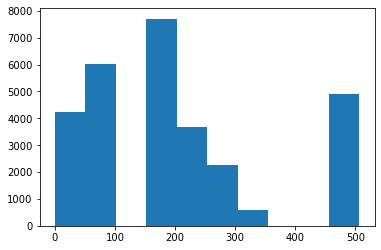

In [121]:
plt.hist(v1)

<AxesSubplot:xlabel='Jan_Bill_Amount', ylabel='Density'>

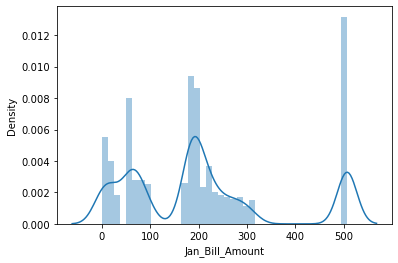

In [122]:
sns.distplot(v1)

In [123]:
#feb_bill_amount

<AxesSubplot:xlabel='Feb_Bill_Amount', ylabel='Density'>

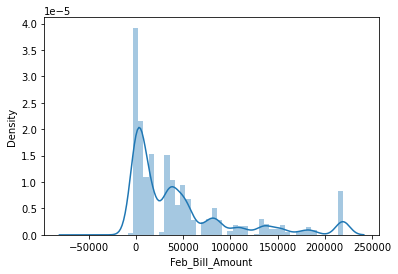

In [124]:
sns.distplot(df.Feb_Bill_Amount)

In [125]:
df.loc[df["Feb_Bill_Amount"]==0]

,Credit_Amount,Gender,Academic_Qualification,Marital,Age_Years,Repayment_Status_Jan,Repayment_Status_Feb,Repayment_Status_March,Repayment_Status_April,Repayment_Status_May,...,April_Bill_Amount,May_Bill_Amount,June_Bill_Amount,Previous_Payment_Jan,Previous_Payment_Feb,Previous_Payment_March,Previous_Payment_April,Previous_Payment_May,Previous_Payment_June,Default_Payment
9,20000.0,1,3,2,35,0,0,0,0,0,...,0.0,13007.0,13812.0,0.0,0.0,0.0,13007.0,1133.0,0.0,0
18,360000.0,2,1,1,49,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
19,280000.0,2,1,2,29,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
45,220000.0,1,1,2,29,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
64,230000.0,2,2,1,51,0,0,0,0,0,...,0.0,2353.0,0.0,0.0,0.0,0.0,3353.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29909,360000.0,1,1,2,32,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
29973,230000.0,1,2,1,35,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
29979,280000.0,1,1,1,32,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
29985,240000.0,1,1,2,30,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [126]:
df.Feb_Bill_Amount.skew()

1.6325755389147192

In [127]:
v2=np.sqrt(df.Feb_Bill_Amount )
v2

0         55.704578
1         41.653331
2        118.477846
3        219.847675
4         74.632433
            ...    
29995    428.736516
29996     42.871902
29997     57.922362
29998    279.960712
29999    220.918537
Name: Feb_Bill_Amount, Length: 30000, dtype: float64

In [128]:
v2.skew()

0.5767015488267642

<AxesSubplot:xlabel='Feb_Bill_Amount', ylabel='Density'>

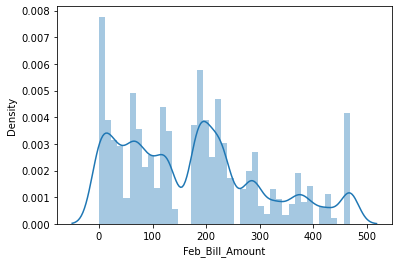

In [129]:
sns.distplot(v2)

In [130]:
#march_Bill_Amount

<AxesSubplot:xlabel='March_Bill_Amount', ylabel='Density'>

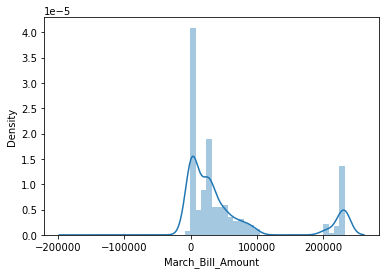

In [131]:
sns.distplot(df.March_Bill_Amount)

In [132]:
df.loc[df["March_Bill_Amount"]==0]

,Credit_Amount,Gender,Academic_Qualification,Marital,Age_Years,Repayment_Status_Jan,Repayment_Status_Feb,Repayment_Status_March,Repayment_Status_April,Repayment_Status_May,...,April_Bill_Amount,May_Bill_Amount,June_Bill_Amount,Previous_Payment_Jan,Previous_Payment_Feb,Previous_Payment_March,Previous_Payment_April,Previous_Payment_May,Previous_Payment_June,Default_Payment
9,20000.0,1,3,2,35,0,0,0,0,0,...,0.0,13007.0,13812.0,0.0,0.0,0.0,13007.0,1133.0,0.0,0
18,360000.0,2,1,1,49,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
19,280000.0,2,1,2,29,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
24,90000.0,1,1,2,23,0,0,0,0,0,...,5399.0,6360.0,8282.0,6767.0,0.0,5599.0,1300.0,3055.0,2000.0,0
38,50000.0,1,1,2,25,1,0,0,0,0,...,0.0,0.0,0.0,790.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29973,230000.0,1,2,1,35,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
29979,280000.0,1,1,1,32,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
29985,240000.0,1,1,2,30,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
29986,360000.0,1,1,2,35,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [133]:
df.March_Bill_Amount.skew()

1.6269873291449792

In [134]:
v3=np.sqrt(df.March_Bill_Amount )
v3

0         26.248809
1         51.788030
2        153.489413
3        222.018017
4        189.301347
            ...    
29995    456.470152
29996     59.177699
29997     52.516664
29998    276.231787
29999    223.078462
Name: March_Bill_Amount, Length: 30000, dtype: float64

In [135]:
v3.skew()

0.7857073711024068

<AxesSubplot:xlabel='March_Bill_Amount', ylabel='Density'>

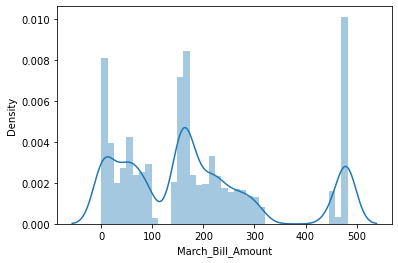

In [136]:
sns.distplot(v3)

In [137]:
#April_Bill_Amount

<AxesSubplot:xlabel='April_Bill_Amount', ylabel='Density'>

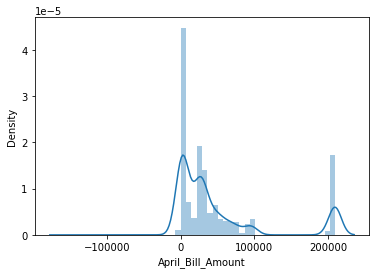

In [138]:
sns.distplot(df.April_Bill_Amount)

In [139]:
df.loc[df["April_Bill_Amount"]==0]

,Credit_Amount,Gender,Academic_Qualification,Marital,Age_Years,Repayment_Status_Jan,Repayment_Status_Feb,Repayment_Status_March,Repayment_Status_April,Repayment_Status_May,...,April_Bill_Amount,May_Bill_Amount,June_Bill_Amount,Previous_Payment_Jan,Previous_Payment_Feb,Previous_Payment_March,Previous_Payment_April,Previous_Payment_May,Previous_Payment_June,Default_Payment
0,20000.0,2,2,1,24,2,2,0,0,0,...,0.0,0.0,0.0,0.0,679.0,0.0,0.0,0.0,0.0,1
9,20000.0,1,3,2,35,0,0,0,0,0,...,0.0,13007.0,13812.0,0.0,0.0,0.0,13007.0,1133.0,0.0,0
18,360000.0,2,1,1,49,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
19,280000.0,2,1,2,29,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
21,220000.0,2,2,1,39,0,0,0,0,0,...,0.0,632.0,316.0,316.0,326.0,0.0,533.0,316.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29973,230000.0,1,2,1,35,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
29979,280000.0,1,1,1,32,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
29985,240000.0,1,1,2,30,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
29986,360000.0,1,1,2,35,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [140]:
v4=np.sqrt(df.April_Bill_Amount )
v4

0          0.000000
1         57.201399
2        155.987179
3        171.242518
4        144.706600
            ...    
29995    314.649011
29996     99.894945
29997    144.841292
29998    229.725924
29999    191.141309
Name: April_Bill_Amount, Length: 30000, dtype: float64

In [141]:
v4.skew()

0.7617962105334054

<AxesSubplot:xlabel='April_Bill_Amount', ylabel='Density'>

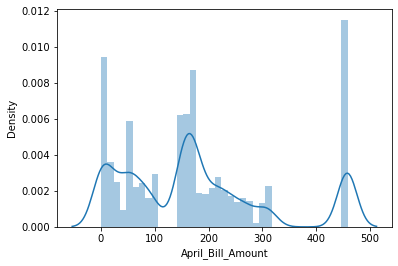

In [142]:
sns.distplot(v4)

In [143]:
#May_Bill_Amount

<AxesSubplot:xlabel='May_Bill_Amount', ylabel='Density'>

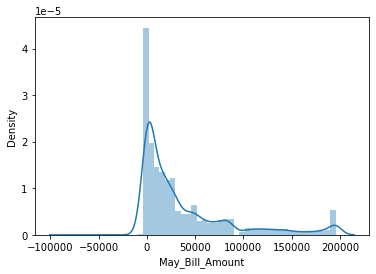

In [144]:
sns.distplot(df.May_Bill_Amount)

In [145]:
df.loc[df["May_Bill_Amount"]==0]

,Credit_Amount,Gender,Academic_Qualification,Marital,Age_Years,Repayment_Status_Jan,Repayment_Status_Feb,Repayment_Status_March,Repayment_Status_April,Repayment_Status_May,...,April_Bill_Amount,May_Bill_Amount,June_Bill_Amount,Previous_Payment_Jan,Previous_Payment_Feb,Previous_Payment_March,Previous_Payment_April,Previous_Payment_May,Previous_Payment_June,Default_Payment
0,20000.0,2,2,1,24,2,2,0,0,0,...,0.0,0.0,0.0,0.0,679.0,0.0,0.0,0.0,0.0,1
18,360000.0,2,1,1,49,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
19,280000.0,2,1,2,29,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
23,450000.0,2,1,1,40,0,0,0,0,0,...,560.0,0.0,0.0,19439.0,2473.0,560.0,0.0,0.0,1128.0,1
34,500000.0,1,1,1,58,0,0,0,0,0,...,3290.0,0.0,5283.0,6006.0,32277.0,5190.0,0.0,5393.0,768.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29979,280000.0,1,1,1,32,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
29985,240000.0,1,1,2,30,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
29986,360000.0,1,1,2,35,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
29989,250000.0,1,1,2,35,0,0,0,0,0,...,790.0,0.0,0.0,9064.0,0.0,795.0,0.0,0.0,0.0,0


In [146]:
v5=np.sqrt(df.May_Bill_Amount )
v5

0          0.000000
1         58.779248
2        121.852370
3        169.876426
4        134.707090
            ...    
29995    176.739922
29996     71.972217
29997    143.464281
29998    108.880669
29999    180.077761
Name: May_Bill_Amount, Length: 30000, dtype: float64

In [147]:
v5.skew()

0.6822546332479436

<AxesSubplot:xlabel='May_Bill_Amount', ylabel='Density'>

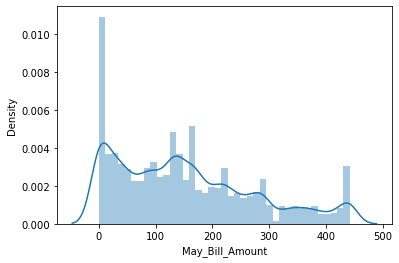

In [148]:
sns.distplot(v5)

In [149]:
#june_Bill_Amount

<AxesSubplot:xlabel='June_Bill_Amount', ylabel='Density'>

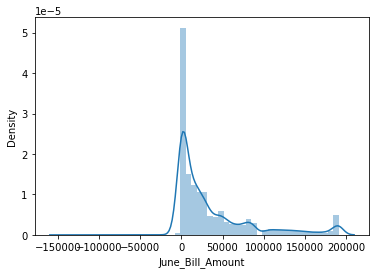

In [150]:
sns.distplot(df.June_Bill_Amount)

In [151]:
df.loc[df["June_Bill_Amount"]==0]

,Credit_Amount,Gender,Academic_Qualification,Marital,Age_Years,Repayment_Status_Jan,Repayment_Status_Feb,Repayment_Status_March,Repayment_Status_April,Repayment_Status_May,...,April_Bill_Amount,May_Bill_Amount,June_Bill_Amount,Previous_Payment_Jan,Previous_Payment_Feb,Previous_Payment_March,Previous_Payment_April,Previous_Payment_May,Previous_Payment_June,Default_Payment
0,20000.0,2,2,1,24,2,2,0,0,0,...,0.0,0.0,0.0,0.0,679.0,0.0,0.0,0.0,0.0,1
18,360000.0,2,1,1,49,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
19,280000.0,2,1,2,29,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
23,450000.0,2,1,1,40,0,0,0,0,0,...,560.0,0.0,0.0,19439.0,2473.0,560.0,0.0,0.0,1128.0,1
38,50000.0,1,1,2,25,1,0,0,0,0,...,0.0,0.0,0.0,790.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29985,240000.0,1,1,2,30,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
29986,360000.0,1,1,2,35,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
29989,250000.0,1,1,2,35,0,0,0,0,0,...,790.0,0.0,0.0,9064.0,0.0,795.0,0.0,0.0,0.0,0
29992,20000.0,1,3,1,43,0,0,0,0,0,...,0.0,0.0,0.0,3000.0,0.0,0.0,0.0,0.0,0.0,0


In [152]:
v6=np.sqrt(df.June_Bill_Amount )
v6

0          0.000000
1         57.105166
2        124.691620
3        168.958575
4        134.651402
            ...    
29995    126.015872
29996      0.000000
29997    135.488007
29998    221.006787
29999    123.745707
Name: June_Bill_Amount, Length: 30000, dtype: float64

In [153]:
v6.skew()

0.6887715834967123

<AxesSubplot:xlabel='June_Bill_Amount', ylabel='Density'>

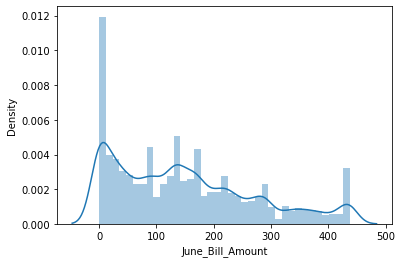

In [154]:
sns.distplot(v6)

In [ ]:
#prediction using model algorithms

In [155]:
df.head(2)

,Credit_Amount,Gender,Academic_Qualification,Marital,Age_Years,Repayment_Status_Jan,Repayment_Status_Feb,Repayment_Status_March,Repayment_Status_April,Repayment_Status_May,...,April_Bill_Amount,May_Bill_Amount,June_Bill_Amount,Previous_Payment_Jan,Previous_Payment_Feb,Previous_Payment_March,Previous_Payment_April,Previous_Payment_May,Previous_Payment_June,Default_Payment
0,20000.0,2,2,1,24,2,2,0,0,0,...,0.0,0.0,0.0,0.0,679.0,0.0,0.0,0.0,0.0,1
1,220000.0,2,2,2,26,0,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,2000.0,1000.0,1000.0,0.0,2000.0,1


In [156]:
df.shape

(30000, 24)

In [157]:
x=df.iloc[:,0:-1]
y=df.iloc[:,-1]

In [159]:
x.head(2)

,Credit_Amount,Gender,Academic_Qualification,Marital,Age_Years,Repayment_Status_Jan,Repayment_Status_Feb,Repayment_Status_March,Repayment_Status_April,Repayment_Status_May,...,March_Bill_Amount,April_Bill_Amount,May_Bill_Amount,June_Bill_Amount,Previous_Payment_Jan,Previous_Payment_Feb,Previous_Payment_March,Previous_Payment_April,Previous_Payment_May,Previous_Payment_June
0,20000.0,2,2,1,24,2,2,0,0,0,...,689.0,0.0,0.0,0.0,0.0,679.0,0.0,0.0,0.0,0.0
1,220000.0,2,2,2,26,0,2,0,0,0,...,2682.0,3272.0,3455.0,3261.0,0.0,2000.0,1000.0,1000.0,0.0,2000.0


In [161]:
from sklearn.model_selection import train_test_split

In [162]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=100)

In [163]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((24000, 23), (6000, 23), (24000,), (6000,))

# logistic regression

In [164]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()

In [165]:
lg.fit(x_train,y_train)

LogisticRegression()

In [167]:
lg_p=lg.predict(x_test)
lg_p

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [168]:
lg_prob=lg.predict_proba(x_test)
#lg_prob

In [169]:
from sklearn.metrics import confusion_matrix

In [170]:
lg_m=confusion_matrix(lg_p,y_test)
lg_m

array([[4622, 1375],
       [   3,    0]], dtype=int64)

In [171]:
lg_acc=lg_m.diagonal().sum()/lg_m.sum()*100
lg_acc

77.03333333333333

In [172]:
from sklearn.metrics import classification_report

In [173]:
print(classification_report(lg_p,y_test))

              precision    recall  f1-score   support

           0       1.00      0.77      0.87      5997
           1       0.00      0.00      0.00         3

    accuracy                           0.77      6000
   macro avg       0.50      0.39      0.44      6000
weighted avg       1.00      0.77      0.87      6000



In [175]:
df.Default_Payment.value_counts()

0    23364
1     6636
Name: Default_Payment, dtype: int64

In [176]:
#AUC/ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [177]:
roc=roc_auc_score(lg_p,y_test)
roc

0.3853593463398366

In [178]:
df1=pd.DataFrame(lg_prob)
df1

,0,1
0,0.684878,0.315122
1,0.559077,0.440923
2,0.565918,0.434082
3,0.760121,0.239879
4,0.995307,0.004693
...,...,...
5995,0.842472,0.157528
5996,0.777694,0.222306
5997,0.956893,0.043107
5998,0.681442,0.318558


In [179]:
fpr,tpr,threshold=roc_curve(y_test,df1.iloc[:,1])

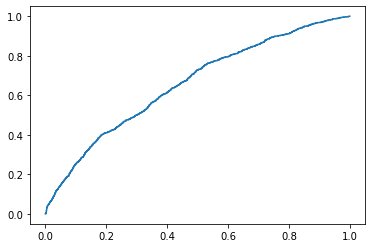

In [180]:
plt.plot(fpr,tpr)

In [181]:
#PRC CURVE
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score

In [182]:
precision,recall,threshold=precision_recall_curve(y_test,df1.iloc[:,1])

Text(0.5, 1.0, 'precision-Recall')

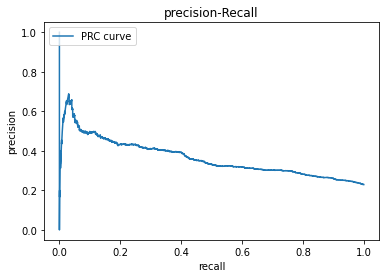

In [183]:
plt.plot(recall,precision,label="PRC curve")
plt.xlabel("recall")
plt.ylabel("precision")
plt.legend(loc="upper left")
plt.title("precision-Recall")

# decision tree

In [184]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

In [185]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [186]:
dt_p=dt.predict(x_test)

In [187]:
dt_cf=confusion_matrix(dt_p,y_test)
dt_cf

array([[3772,  803],
       [ 853,  572]], dtype=int64)

In [188]:
dt_acc1=dt_cf.diagonal().sum()/dt_cf.sum()*100
dt_acc1

72.39999999999999

In [189]:
dt.feature_importances_

array([0.05596261, 0.01462814, 0.02506752, 0.01436397, 0.0746687 ,
       0.15824906, 0.03104602, 0.00650183, 0.00652978, 0.00672456,
       0.00740589, 0.05499163, 0.05692967, 0.04597655, 0.0480669 ,
       0.04561847, 0.04816375, 0.04707104, 0.04847522, 0.06077175,
       0.04448042, 0.04603408, 0.05227245])

In [190]:
dt_df=pd.DataFrame({"Importance":list(dt.feature_importances_),"columns":list(x)})
dt_df

,Importance,columns
0,0.055963,Credit_Amount
1,0.014628,Gender
2,0.025068,Academic_Qualification
3,0.014364,Marital
4,0.074669,Age_Years
5,0.158249,Repayment_Status_Jan
6,0.031046,Repayment_Status_Feb
7,0.006502,Repayment_Status_March
8,0.006530,Repayment_Status_April
9,0.006725,Repayment_Status_May


In [191]:
print(classification_report(dt_p,y_test))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82      4575
           1       0.42      0.40      0.41      1425

    accuracy                           0.72      6000
   macro avg       0.62      0.61      0.61      6000
weighted avg       0.72      0.72      0.72      6000



# random forest

In [193]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

In [194]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [195]:
rf_p=rf.predict(x_test)

In [196]:
cf=confusion_matrix(rf_p,y_test)
cf

array([[4362,  830],
       [ 263,  545]], dtype=int64)

In [197]:
rf_acc=cf.diagonal().sum()/cf.sum()*100

In [198]:
rf_acc

81.78333333333333

In [199]:
print(classification_report(rf_p,y_test))

              precision    recall  f1-score   support

           0       0.94      0.84      0.89      5192
           1       0.40      0.67      0.50       808

    accuracy                           0.82      6000
   macro avg       0.67      0.76      0.69      6000
weighted avg       0.87      0.82      0.84      6000

